[ML Terminologies](#mlt)

[Knowing the data](#kda)

[Train and Test Sets](#tts)

[KNN - From scratch and Sklearn](#kn)

[Neural networks - From scratch](#nn)

[Backpropagation](#bpp)

[MNIST - From scratch](#mn)

[Dropout](#drt)


<a id="mlt"></a>

### Terminologies

#### Classifier

A program or a function which maps from unlabeled instances to classes is called a classifier.

#### Confusion Matrix

A confusion matrix, also called a contingeny table or error matrix, is used to visualize the performance of a classifier.
The columns of the matrix represent the instances of the predicted classes and the rows represent the instances of the actual class. (Note: It can be the other way around as well.)
In the case of binary classification the table has 2 rows and 2 columns.


#### Accuracy (error rate)

Accuracy is a statistical measure which is defined as the quotient of correct predictions made by a classifier divided by the sum of predictions made by the classifier.

The classifier in our previous example predicted correctly predicted 42 male instances and 32 female instance.

Therefore, the accuracy can be calculated by:

accuracy = (42+32)/(42+8+18+32)


#### Precision and Recall


Accuracy: (TN+TP)/(TN+TP+FN+FP)
Precision: TP/(TP+FP)
Recall: TP/(TP+FN)

<a id="kda"></a>

### Knowing the data

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
# The features of each sample flower are stored in the data attribute of the dataset:

n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

Number of samples: 150
Number of features: 4
[5.1 3.5 1.4 0.2]


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
### Visualising the Features of the Iris Data Set

## The feature data is four dimensional, but we can visualize one or two of the dimensions at a time using a simple histogram or scatter-plot.

from sklearn.datasets import load_iris
iris = load_iris()

print(iris.data[iris.target==1][:5])

print(iris.data[iris.target==1, 0][:5])

[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]
[7.  6.4 6.9 5.5 6.5]


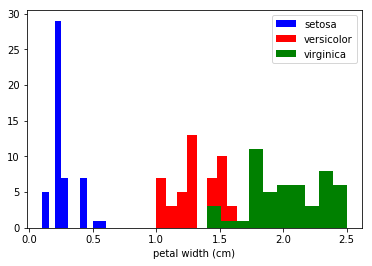

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
x_index = 3

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.hist(iris.data[iris.target==label, x_index], 
            label=iris.target_names[label],
            color=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
fig.show()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

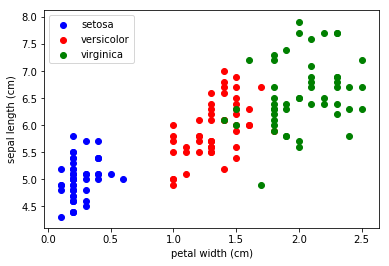

In [ ]:
fig, ax = plt.subplots()

x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.legend(loc='upper left')
plt.show()

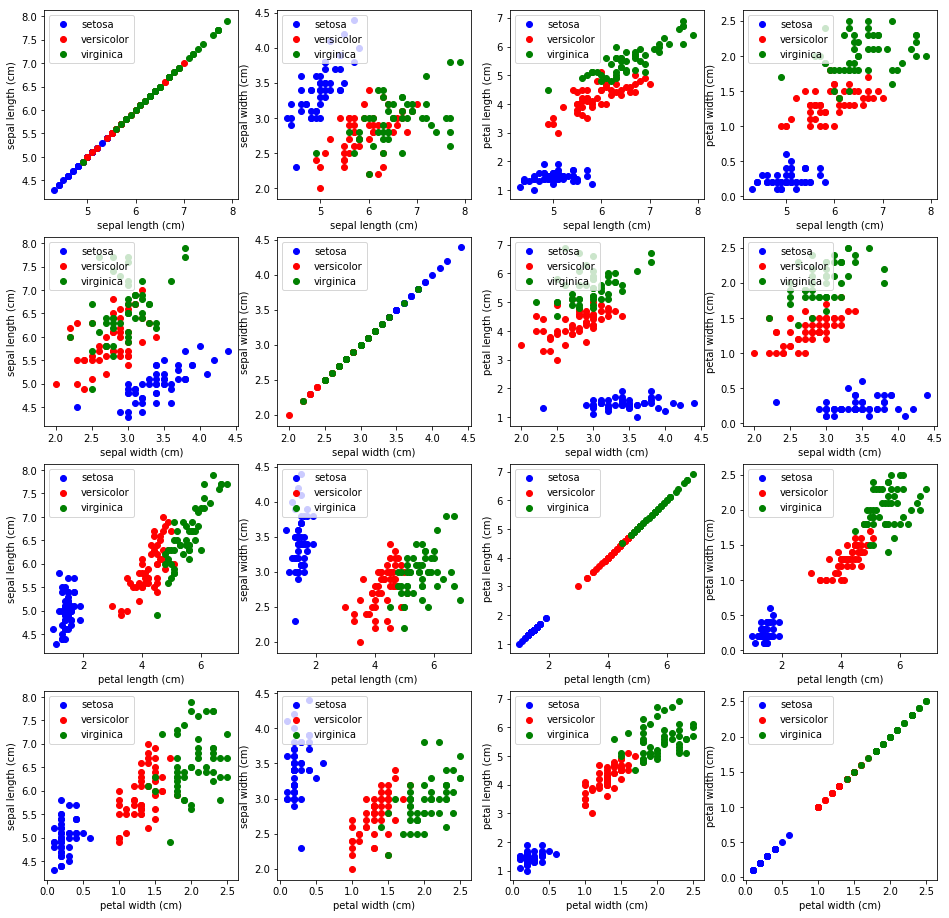

In [ ]:
# Change x_index and y_index in the above script and find a combination of two parameters which maximally separate the three classes.

import matplotlib.pyplot as plt
%matplotlib inline

n = len(iris.feature_names)
fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['blue', 'red', 'green']

for x in range(n):
    for y in range(n):
        xname = iris.feature_names[x]
        yname = iris.feature_names[y]
        for color_ind in range(len(iris.target_names)):
            ax[x, y].scatter(iris.data[iris.target==color_ind, x], 
                             iris.data[iris.target==color_ind, y],
                             label=iris.target_names[color_ind],
                             c=colors[color_ind])

        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')


plt.show()

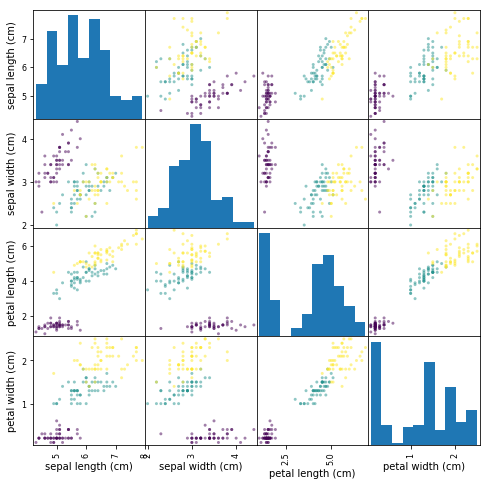

In [ ]:
# Scatterplot 'Matrices

# Instead of doing it manually we can also use the scatterplot matrix provided by the pandas module.

# Scatterplot matrices show scatter plots between all features in the data set, as well as histograms to show the distribution of each feature.

import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

pd.plotting.scatter_matrix(iris_df, 
                           c=iris.target, 
                           figsize=(8, 8)
                          );

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [ ]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

print(digits.data[0])
print(digits.target)

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


In [ ]:
print(digits.target.shape)

(1797,)


In [ ]:
# The is just the digit represented by the data. The data is an array of length 64... but what does this data mean?
#There's a clue in the fact that we have two versions of the data array: data and images. Let's take a look at them:

print(digits.data.shape)
print(digits.images.shape)

#We can see that they're related by a simple reshaping:

import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

(1797, 64)
(1797, 8, 8)
True


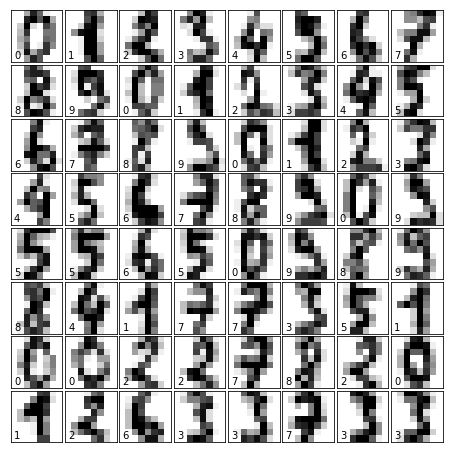

In [ ]:
# Let's visualize the data. It's little bit more involved than the simple scatter-plot we used above, but we can do it rather quickly.
import matplotlib.pyplot as plt
%matplotlib inline


# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We see now what the features mean. Each feature is a real-valued quantity representing the darkness of a pixel in an 8x8 image of a hand-written digit.

Even though each sample has data that is inherently two-dimensional, the data matrix flattens this 2D data into a single vector, which can be contained in one row of the data matrix.

In [ ]:
## Another dataset

from sklearn.datasets import fetch_olivetti_faces
# fetch the faces data
faces = fetch_olivetti_faces()
# Use a script like above to plot the faces image data.
# hint: plt.cm.bone is a good colormap for this data
faces.keys()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/akash/scikit_learn_data


dict_keys(['data', 'images', 'target', 'DESCR'])

In [ ]:
n_samples, n_features = faces.data.shape
print((n_samples, n_features))

(400, 4096)


In [ ]:
np.sqrt(4096)

64.0

In [ ]:
faces.images.shape

(400, 64, 64)

In [ ]:
faces.data.shape

print(np.all(faces.images.reshape((400, 4096)) == faces.data))

True


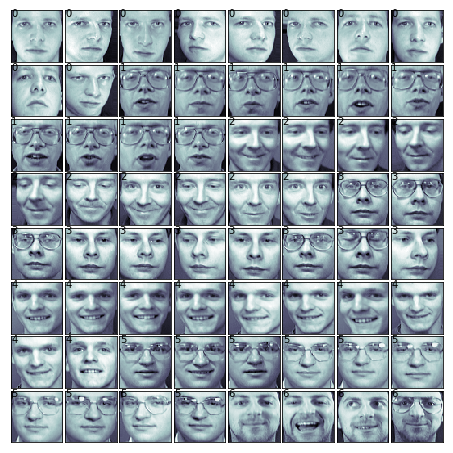

In [ ]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(faces.target[i]))

<a id="tts"></a>


### Train and Test Sets

You have your data ready and you are eager to start training the classifier? But be careful: When your classifier will be finished, you will need some test data to evaluate your classifier. If you evaluate your classifier with the data used for learning, you may see surprisingly good results. What we actually want to test is the performance of classifying on unknown data.

For this purpose, we need to split our data into two parts:

A training set with which the learning algorithm adapts or learns the model
A test set to evaluate the generalization performance of the model

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Looking at the labels of iris.target shows us that the data is sorted.

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# The first thing we have to do is rearrange the data so that it is not sorted anymore.

indices = np.random.permutation(len(iris.data))
indices

array([105, 108,  30,  98,  84,  35,   1, 119,  61, 107, 129, 110, 130,
       140,  82,   4,  48,  92, 144,   3,  28,  85, 142,  77, 103, 121,
        27,  45, 126, 148,  68,  62, 135,  90,  60,  95, 132,  26, 104,
        72, 101, 123, 143,  17, 124, 115,  93, 147,  14,  34,   2,  19,
         9,  10, 131,  12,  81,  91, 109, 136, 125,   7,  52,  97,  16,
       120,  76,  36,  58,  24,  41,  71,  15, 116,  80,  42, 118,  88,
       111, 102,  25,  83, 112,  49,  13,  37, 133, 106,  40,  56,  64,
        74, 122, 141,  43,  53,  57,  70, 138,  99,  67,  31,  78,   0,
        11, 128, 114,  23, 139,  46,  75,  18,  66, 146,  54,  79, 134,
         5,  39,  47,  94,  69,  50, 145, 117, 113,  29,  51,  87,  96,
         8,  55,  89, 137,  65,   6,  73,  32,  86, 100,  21,  59, 127,
        44,  22,  33,  38,  20, 149,  63])

In [ ]:
n_test_samples = 12

learnset_data = iris.data[indices[:-n_test_samples]]

learnset_labels = iris.target[indices[:-n_test_samples]]

testset_data = iris.data[indices[-n_test_samples:]]
testset_labels = iris.target[indices[-n_test_samples:]]

print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

150

In [ ]:
# It was not difficult to split the data manually into a learn (train) and an evaluation (test) set.
# Yet, it isn't necessary, because sklearn provides us with a function to do it.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

data, labels = iris.data, iris.target

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    

print("Labels for training and testing data")
print(test_data[:5])
print(test_labels[:5])

Labels for training and testing data
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
[1 0 2 1 1]


In [ ]:
# Generate Synthetic Data with Scikit-Learn

# It is a lot easier to use the possibilities of Scikit-Learn to create synthetic data. In the following example we use the function make_blobs of sklearn.datasets to create 'blob' like data distributions:

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

data, labels = make_blobs(n_samples=1000, 
                          #centers=n_classes, 
                          centers=np.array([[2, 3], [4, 5], [7, 9]]),
                          random_state=1)

labels = labels.reshape((labels.shape[0],1))

all_data = np.concatenate((data, labels), axis=1)

all_data[:10]
np.savetxt("squirrels.txt", all_data)
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

In [ ]:
# For some people it might be complicated to understand the combination of reshape and concatenate. Therefore, you can see an extremely simple example in the following code:

import numpy as np

a = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])

b = b.reshape((b.shape[0], 1))

print(b)

x = np.concatenate((a, b), axis=1)
x

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

In [ ]:
# Reading the data and conversion back into 'data' and 'labels'

file_data = np.loadtxt("squirrels.txt")

data = file_data[:,:-1]
labels = file_data[:,2:]

labels = labels.reshape((labels.shape[0]))

In [ ]:
data

array([[1.72415394, 4.22895559],
       [4.16466507, 5.77817418],
       [4.51441156, 4.98274913],
       ...,
       [0.92703572, 3.49515861],
       [2.28558733, 3.88514116],
       [3.27375593, 4.96710175]])

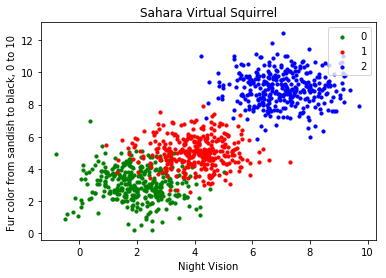

In [ ]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))

ax.set(xlabel='Night Vision',
       ylabel='Fur color from sandish to black, 0 to 10 ',
       title='Sahara Virtual Squirrel')


ax.legend(loc='upper right')

In [ ]:
from sklearn.model_selection import train_test_split

data_sets = train_test_split(data, 
                       labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42 # garantees same output for every run
                      )

train_data, test_data, train_labels, test_labels = data_sets

# import model

from sklearn.neighbors import KNeighborsClassifier

# create classifier

knn = KNeighborsClassifier(n_neighbors=8)

# train

knn.fit(train_data, train_labels)

# test on test data:

calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [ ]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))

Accuracy: 0.97


In [ ]:
import sklearn.datasets as ds
ch = ds.california_housing
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

Automatically created module for IPython interactive environment


In [ ]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

<Figure size 576x576 with 0 Axes>

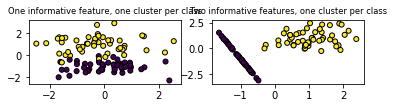

In [ ]:
plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

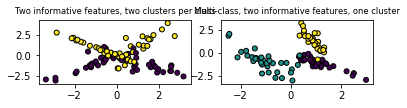

In [ ]:
plt.subplot(323)
plt.title("Two informative features, two clusters per class",
          fontsize='small')
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

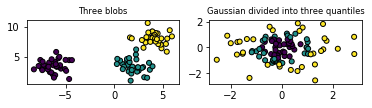

In [ ]:
plt.subplot(325)
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

<a id="kn"></a>

## KNN - From scratch and Sklearn

Nearest Neighbor Algorithm:

Given a set of categories {c1,c2,...cn}, also called classes, e.g. {"male", "female"}. There is also a learnset LS consisting of labelled instances.

The task of classification consists in assigning a category or class to an arbitrary instance. If the instance o is an element of LS, the label of the instance will be used.

Now, we will look at the case where o is not in LS:

o is compared with all instances of LS. A distance metric is used for comparison. We determine the k closest neighbors of o, i.e. the items with the smallest distances. k is a user defined constant and a positive integer, which is usually small.

The most common class of LS will be assigned to the instance o. If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

The algorithm for the k-nearest neighbor classifier is among the simplest of all machine learning algorithms. k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all the computations are performed, when we do the actual classification.

### knn from scratch

Before we actually start with writing a nearest neighbor classifier, we need to think about the data, i.e. the learnset. We will use the "iris" dataset provided by the datasets of the sklearn module.

The data set consists of 50 samples from each of three species of Iris

Iris setosa,
Iris virginica and
Iris versicolor.

In [ ]:
# Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data[0], iris_data[79], iris_data[100])
print(iris_labels[0], iris_labels[79], iris_labels[100])

[5.1 3.5 1.4 0.2] [5.7 2.6 3.5 1. ] [6.3 3.3 6.  2.5]
0 1 2


In [ ]:
# We create a learnset from the sets above. We use permutation from np.random to split the data randomly.

np.random.seed(42)
indices = np.random.permutation(len(iris_data))

n_training_samples = 12

learnset_data = iris_data[indices[:-n_training_samples]]
learnset_labels = iris_labels[indices[:-n_training_samples]]

testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]

print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]] [1 0 2 1]
[[5.7 2.8 4.1 1.3]
 [6.5 3.  5.5 1.8]
 [6.3 2.3 4.4 1.3]
 [6.4 2.9 4.3 1.3]] [1 2 1 1]


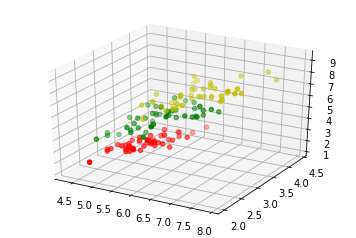

In [ ]:
# The following code is only necessary to visualize the data of our learnset. Our data consists of four values per iris item, so we will reduce the data to three values by summing up the third and fourth value. This way, we are capable of depicting the data in 3-dimensional space:
# following line is only necessary, if you use ipython notebook!!!

%matplotlib inline 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0])
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(sum(learnset_data[i][2:]))

colours = ("r", "g", "y")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

In [ ]:
# Determining the Neighbors
# To determine the similarity between two instances, we need a distance function. In our example, the Euclidean distance is ideal:

def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)

print(distance([3, 5], [1, 1]))
print(distance(learnset_data[3], learnset_data[44]))

4.47213595499958
3.4190641994557516


In [ ]:
# The function 'get_neighbors returns a list with 'k' neighbors, which are closest to the instance 'test_instance':

def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [ ]:
# We will test the function with our iris samples:

for i in range(5):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print(i, 
          testset_data[i], 
          testset_labels[i], 
          neighbors)

0 [5.7 2.8 4.1 1.3] 1 [(array([5.7, 2.9, 4.2, 1.3]), 0.14142135623730995, 1), (array([5.6, 2.7, 4.2, 1.3]), 0.17320508075688815, 1), (array([5.6, 3. , 4.1, 1.3]), 0.22360679774997935, 1)]
1 [6.5 3.  5.5 1.8] 2 [(array([6.4, 3.1, 5.5, 1.8]), 0.1414213562373093, 2), (array([6.3, 2.9, 5.6, 1.8]), 0.24494897427831783, 2), (array([6.5, 3. , 5.2, 2. ]), 0.3605551275463988, 2)]
2 [6.3 2.3 4.4 1.3] 1 [(array([6.2, 2.2, 4.5, 1.5]), 0.26457513110645864, 1), (array([6.3, 2.5, 4.9, 1.5]), 0.574456264653803, 1), (array([6. , 2.2, 4. , 1. ]), 0.5916079783099617, 1)]
3 [6.4 2.9 4.3 1.3] 1 [(array([6.2, 2.9, 4.3, 1.3]), 0.20000000000000018, 1), (array([6.6, 3. , 4.4, 1.4]), 0.2645751311064587, 1), (array([6.6, 2.9, 4.6, 1.3]), 0.3605551275463984, 1)]
4 [5.6 2.8 4.9 2. ] 2 [(array([5.8, 2.7, 5.1, 1.9]), 0.31622776601683755, 2), (array([5.8, 2.7, 5.1, 1.9]), 0.31622776601683755, 2), (array([5.7, 2.5, 5. , 2. ]), 0.33166247903553986, 2)]


In [ ]:
# Voting to get a single result
# We will write a vote function now. This functions uses the class 'Counter' from collections to count the quantity of the classes inside of an instance list. This instance list will be the neighbors of course. The function 'vote' returns the most common class:

from collections import Counter

def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [ ]:
# We will test 'vote' on our training samples:

for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]


In [ ]:
# We can see that the predictions correspond to the labelled results, except in case of the item with the index 8.
#'vote_prob' is a function like 'vote' but returns the class name and the probability for this class:

def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              5, 
                              distance=distance)
    print("index: ", i, 
          ", vote_prob: ", vote_prob(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , vote_prob:  (2, 1.0) , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , vote_prob:  (2, 1.0) , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , vote_prob:  (2, 0.8) , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , vote_prob:  (1, 1.0) , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , vote_prob:  (2, 1.0) , label:  2 , data:  [7.1 3.  5.9 2.1]


The Weighted Nearest Neighbour Classifier

We looked only at k items in the vicinity of an unknown object „UO", and had a majority vote. Using the majority vote has shown quite efficient in our previous example, but this didn't take into account the following reasoning: The farther a neighbor is, the more it "deviates" from the "real" result. Or in other words, we can trust the closest neighbors more than the farther ones. Let's assume, we have 11 neighbors of an unknown item UO. The closest five neighbors belong to a class A and all the other six, which are farther away belong to a class B. What class should be assigned to UO? The previous approach says B, because we have a 6 to 5 vote in favor of B. On the other hand the closest 5 are all A and this should count more.

To pursue this strategy, we can assign weights to the neighbors in the following way: The nearest neighbor of an instance gets a weight 1/1, the second closest gets a weight of 1/2 and then going on up to 1/k for the farthest away neighbor.

This means that we are using the harmonic series as weights:

In [ ]:
# We implement this in the following function:

def vote_harmonic_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        class_counter[neighbors[index][2]] += 1/(index+1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)
        
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              6, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", 
          vote_harmonic_weights(neighbors,
                                all_results=True))

index:  0 , result of vote:  (1, [(1, 1.0)])
index:  1 , result of vote:  (2, [(2, 1.0)])
index:  2 , result of vote:  (1, [(1, 1.0)])
index:  3 , result of vote:  (1, [(1, 1.0)])
index:  4 , result of vote:  (2, [(2, 0.9319727891156463), (1, 0.06802721088435375)])
index:  5 , result of vote:  (2, [(2, 0.8503401360544217), (1, 0.14965986394557826)])
index:  6 , result of vote:  (0, [(0, 1.0)])
index:  7 , result of vote:  (1, [(1, 1.0)])
index:  8 , result of vote:  (1, [(1, 1.0)])
index:  9 , result of vote:  (0, [(0, 1.0)])
index:  10 , result of vote:  (1, [(1, 1.0)])
index:  11 , result of vote:  (2, [(2, 1.0)])


In [ ]:
# The previous approach took only the ranking of the neighbors according to their distance in account. We can improve the voting by using the actual distance. To this purpos we will write a new voting function:

def vote_distance_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        dist = neighbors[index][1]
        label = neighbors[index][2]
        class_counter[label] += 1 / (dist**2 + 1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [ ]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              6, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote_distance_weights(neighbors,
                                                      all_results=True))

index:  0 , result of vote:  (1, [(1, 1.0)])
index:  1 , result of vote:  (2, [(2, 1.0)])
index:  2 , result of vote:  (1, [(1, 1.0)])
index:  3 , result of vote:  (1, [(1, 1.0)])
index:  4 , result of vote:  (2, [(2, 0.8490154592118361), (1, 0.15098454078816387)])
index:  5 , result of vote:  (2, [(2, 0.6736137462184478), (1, 0.3263862537815521)])
index:  6 , result of vote:  (0, [(0, 1.0)])
index:  7 , result of vote:  (1, [(1, 1.0)])
index:  8 , result of vote:  (1, [(1, 1.0)])
index:  9 , result of vote:  (0, [(0, 1.0)])
index:  10 , result of vote:  (1, [(1, 1.0)])
index:  11 , result of vote:  (2, [(2, 1.0)])


In [ ]:
# We want to test the previous functions with another very simple dataset:

train_set = [(1, 2, 2), 
             (-3, -2, 0),
             (1, 1, 3), 
             (-3, -3, -1),
             (-3, -2, -0.5),
             (0, 0.3, 0.8),
             (-0.5, 0.6, 0.7),
             (0, 0, 0)
            ]

labels = ['apple',  'banana', 'apple', 
          'banana', 'apple', "orange",
          'orange', 'orange']

k = 1
for test_instance in [(0, 0, 0), (2, 2, 2), 
                      (-3, -1, 0), (0, 1, 0.9),
                      (1, 1.5, 1.8), (0.9, 0.8, 1.6)]:
    neighbors = get_neighbors(train_set, 
                              labels, 
                              test_instance, 
                              2)

    print("vote distance weights: ", vote_distance_weights(neighbors))

vote distance weights:  ('orange', [('orange', 1.0)])
vote distance weights:  ('apple', [('apple', 1.0)])
vote distance weights:  ('banana', [('banana', 0.5294117647058824), ('apple', 0.47058823529411764)])
vote distance weights:  ('orange', [('orange', 1.0)])
vote distance weights:  ('apple', [('apple', 1.0)])
vote distance weights:  ('apple', [('apple', 0.5084745762711865), ('orange', 0.4915254237288135)])


In [ ]:
## Now we have the SKLEARN MAGIC
# We will use the k-nearest neighbor classifier 'KNeighborsClassifier' from 'sklearn.neighbors' on the Iris data set:

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(learnset_data, learnset_labels) 
KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=5, 
                     p=2,
                     weights='uniform')

print("Predictions form the classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)

Predictions form the classifier:
[1 2 1 1 2 2 0 1 1 0 1 2]
Target values:
[1 2 1 1 2 2 0 1 2 0 1 2]


In [ ]:
learnset_data[:5], learnset_labels[:5]

(array([[6.1, 2.8, 4.7, 1.2],
        [5.7, 3.8, 1.7, 0.3],
        [7.7, 2.6, 6.9, 2.3],
        [6. , 2.9, 4.5, 1.5],
        [6.8, 2.8, 4.8, 1.4]]), array([1, 0, 2, 1, 1]))

<a id="nn"></a>

### Neural Networks from scratch

### Neural networks

it is amazingly simple, what is going on inside the body of a perceptron or neuron. The input signals get multiplied by weight values, i.e. each input has its corresponding weight. This way the input can be adjusted individually for every xi. We can see all the inputs as an input vector and the corresponding weights as the weights vector.

When a signal comes in, it gets multiplied by a weight value that is assigned to this particular input. That is, if a neuron has three inputs, then it has three weights that can be adjusted individually. The weights usually get adjusted during the learn phase.
After this the modified input signals are summed up. It is also possible to add additionally a so-called bias 'b' to this sum. The bias is a value which can also be adjusted during the learn phase.

Finally, the actual output has to be determined. For this purpose an activation or step function Φ is applied to the weighted sum of the input values.

The simplest form of an activation function is a binary function. If the result of the summation is greater than some threshold s, the result of Φ will be 1, otherwise 0.

Before we start programming a simple neural network, we are going to develop a different concept. We want to search for straight lines that separate two points or two classes in a plane. We will only look at straight lines going through the origin. We will look at general straight lines later in the tutorial.

You could imagine that you have two attributes describing an eddible object like a fruit for example: "sweetness" and "sourness".

We could describe this by points in a two-dimensional space. The A axis is used for the values of sweetness and the y axis is correspondingly used for the sourness values. Imagine now that we have two fruits as points in this space, i.e. an orange at position (3.5, 1.8) and a lemon at (1.1, 3.9).

We could define dividing lines to define the points which are more lemon-like and which are more orange-like.

In the following diagram, we depict one lemon and one orange. The green line is separating both points. We assume that all other lemons are above this line and all oranges will be below this line.

![](https://www.python-course.eu/images/orange_lemon_dividing_line.png)

The green line is defined by y = mx where:

m is the slope or gradient of the line and x is the independent variable of the function.

This means that a point P′=(p′1,p′2) is on this line, if the following condition is fulfilled:

mp′1−p′2=0

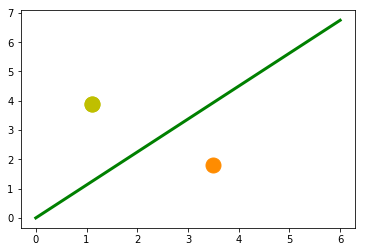

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = np.arange(0, 7)
fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "or", 
        color="darkorange", 
        markersize=15)

ax.plot(1.1, 3.9, "oy", 
        markersize=15)

point_on_line = (4, 4.5)
#ax.plot(1.1, 3.9, "oy", markersize=15)

# calculate gradient:
m = point_on_line[1] / point_on_line[0]  
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()

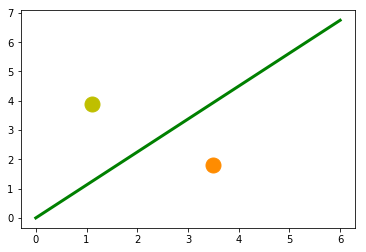

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = np.arange(0, 7)
fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "or", 
        color="darkorange", 
        markersize=15)

ax.plot(1.1, 3.9, "oy", 
        markersize=15)

point_on_line = (4, 4.5)
#ax.plot(1.1, 3.9, "oy", markersize=15)

# calculate gradient:
m = point_on_line[1] / point_on_line[0]  
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()

If a point B=(b1,b2) is below this line, there must be a δB>0 so that the point (b1,b2+δB) will be on the line.

This means that

m⋅b1−(b2+δB)=0
which can be rearranged to

m⋅b1−b2=δB
Finally, we have a criteria for a point to be below the line. m⋅b1−b2 is positve, because δB is positive.

Finally, we have a criteria for a point to be below the line. m⋅b1−b2 is positve, because δB is positive.

The reasoning for "a point is above the line" is analogue: If a point A=(a1,a2) is above the line, there must be a δA>0 so that the point (a1,a2−δA) will be on the line.

This means that

m⋅a1−(a2−δA)=0
which can be rearranged to

m⋅a1−a2=−δA
In summary, we can say: A point P(p1,p2) lies

below the straight line if m⋅p1−p2>0
on the straight line if m⋅p1−p2=0
above the straight line if m⋅p1−p2<0

In [ ]:
# We can now verify this on our fruits. The lemon has the coordinates (1.1, 3.9) and the orange the coordinates 3.5, 1.8. The point on the line, which we used to define our separation straight line has the values (4, 4.5). So m is 4.5 divides by 4.

lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4

# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])

# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


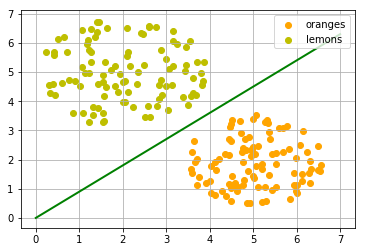

In [ ]:
# We are going to "grow" oranges and lemons with a Python program. We will create these two classes by randomly creating points within a circle with a defined center point and radius. The following Python code will create the classes:

import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()

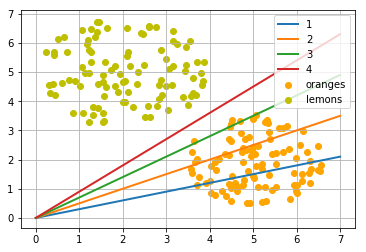

0.8999999999999999


In [ ]:
# The dividing line was again arbitrarily set by eye. The question arises how to do this systematically? We are still only looking at straight lines going through the origin, which are uniquely defined by its slope. the following Python program calculates a dividing line by going through all the fruits and dynamically adjusts the slope of the dividing line we want to calculate. If a point is above the line but should be below the line, the slope will be increment by the value of learning_rate. If the point is below the line but should be above the line, the slope will be decremented by the value of learning_rate.

import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle
slope = 0.1

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

fruits = list(zip(oranges_x, 
                  oranges_y, 
                  repeat(0, len(oranges_x)))) 
fruits += list(zip(lemons_x, 
                   lemons_y, 
                   repeat(1, len(oranges_x))))
shuffle(fruits)

learning_rate = 0.2

line = None
counter = 0
for x, y, label in fruits:
    res = slope * x - y
    if label == 0 and res < 0:
        # point is above line but should be below 
        # => increment slope
        slope += learning_rate
        counter += 1
        ax.plot(X, slope * X, 
                linewidth=2, label=str(counter))
        
    elif label == 1 and res > 1:
        # point is below line but should be above 
        # => decrement slope
        slope -= learning_rate
        counter += 1
        ax.plot(X, slope * X,  
                linewidth=2, label=str(counter))

ax.legend()
ax.grid()
plt.show()

print(slope)

In [ ]:
# A simple Neural Network

We were capable of separating the two classes with a straight line. One might wonder what this has to do with neural networks. We will work out this connection below.
We are going to define a neural network to classify the previous data sets. Our neural network will only consist of one neuron. A neuron with two input values, one for 'sourness' and one for 'sweetness'.

![](https://www.python-course.eu/images/one_perceptron_neural_network.png)

The two input values - called in_data in our Python program below - have to be weighted by weight values. So solve our problem, we define a Perceptron class. An instance of the class is a Perceptron (or Neuron). It can be initialized with the input_length, i.e. the number of input values, and the weights, which can be given as a list, tuple or an array. If there are no values for the weights given or the parameter is set to None, we will initialize the weights to 1 / input_length.

In the following example choose -0.45 and 0.5 as the values for the weights. This is not the normal way to do it. A Neural Network calculates the weights automatically during its training phase, as we will learn later.

In [ ]:
import numpy as np

class Perceptron:
    
    def __init__(self, weights):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum
    
p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")

for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")

-2.1402919535118503, -1.3071887994944085, -1.51159453316879, -0.48041236165903634, -1.3858050204524741, -0.6397458200847141, -1.5938443972321414, -1.0582873832255286, -1.1785192372827578, -1.6866496906598036, 2.734992566261176, 0.47165411990968154, 1.7868441204422165, 1.3656278548586318, 2.106966109695529, 1.9441029630002595, 1.5114476891429196, 2.551615689069525, 1.4455619880635868, 1.652779382058979, 

In [ ]:
#We can see that we get a negative value, if we input an orange and a posive value, if we input a lemon. With this knowledge, we can calculate the accuracy of our neural network on this data set:

from collections import Counter
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1


for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

print(evaluation)

Counter({'corrects': 200})


In [ ]:
How does the calculation work? We multiply the input values with the weights and get negative and positive values. Let us examine what we get, if the calculation results in 0


w1⋅x1+w2⋅x2=0
We can change this equation into

x2=−w1w2⋅x1
We can compare this with the general form of a straight line

y=m⋅x+c
where:

m is the slope or gradient of the line.
c is the y-intercept of the line.
x is the independent variable of the function

We can easily see that our equation corresponds to the definition of a line and the slope (aka gradient) m is −w1w2 and c is equal to 0.

This is a straight line separating the oranges and lemons, which is called the decision boundary.

We visualize this with the following Python program:

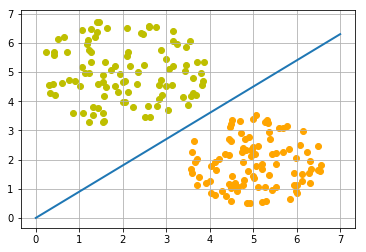

0.9


In [ ]:
#  visualize is with the following Python program:

import time
import matplotlib.pyplot as plt
slope = 0.1

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

slope = 0.45 / 0.5
ax.plot(X, slope * X,  linewidth=2)


ax.grid()
plt.show()

print(slope)


In [ ]:
# Training a Neural Network

#As we mentioned in the previous section: We didn't train our network. We have adjusted the weights to values that we know would form a dividing line. We want to demonstrate now, what is necessary to train our simple neural network.
#Before we start with this task, we will separate our data into training and test data in the following Python program. By setting the random_state to the value 42 we will have the same output for every run, which can be benifial for debugging purposes.

from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, 
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])

[(1.4182815883989126, 6.730294531432508), (4.768602585851741, 2.403687826460562), (5.533575568202748, 2.208607970477525), (4.9966982721791, 2.4294960377925743), (2.1180430003516846, 5.699338001209949), (6.123656964829826, 1.2522375595933088), (3.136508248315214, 4.569021662694616), (4.786566178915706, 1.3135470266662674), (3.67502607044438, 4.221185091650704), (3.465049898869564, 5.249061834769231)] [1, 0, 0, 0, 1, 0, 1, 0, 1, 1]


##### As we start with two arbitrary weights, we cannot expect the result to be correct. For some points (fruits) it may return the proper value, i.e. 1 for a lemon and 0 for an orange. In case we get the wrong result, we have to correct our weight values. First we have to calculate the error. The error is the difference between the target or expected value (target_result) and the calculated value (calculated_result). With this error we have to adjust the weight values with an incremental value, i.e. w1=w1+Δw1 and w2=w2+Δw2

![](https://www.python-course.eu/images/neuron_input_weights_error_correction.png)

If the error e is 0, i.e. the target result is equal to the calculated result, we don't have to do anything. The network is perfect for these input values. If the error is not equal, we have to change the weights. We have to change the weights by adding small values to them. These values may be positive or negative. The amount we have a change a weight value depends on the error and on the input value. Let us assume, x1=0 and x2>0. In this case the result in this case solely results on the input x2. This on the other hand means that we can minimize the error by changing solely w2. If the error is negative, we will have to add a negative value to it, and if the error is positive, we will have to add a positive value to it. From this we can understand that whatever the input values are, we can multiply them with the error and we get values, we can add to the weights. One thing is still missing: Doing this we would learn to fast. We have many samples and each sample should only change the weights a little bit. Therefore we have to multiply this result with a learning rate (self.learning_rate). The learning rate is used to control how fast the weights are updated. Small values for the learning rate result in a long training process, larger values bear the risk of ending up in sub-optimal weight values. We will have a closer look at this in our chapter on backpropagation.

We are ready now to write the code for adapting the weights, which means training the network. For this purpose, we add a method 'adjust' to our Perceptron class. The task of this method is to correct the error.

In [ ]:

import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

[('correct', 160)]
[('correct', 40)]


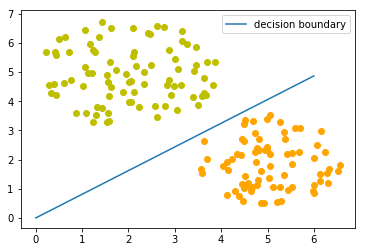

[-1.35516659  1.67041832]


In [ ]:
#Both on the learning and on the test data, we have only correct values, i.e. our network was capable of learning automatically and successfully!
#We visualize the decision boundary with the following program:

import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

1 -2.142275280509582 [-1.33058078 -0.62110635] (4.768602585851741, 2.403687826460562)
4 0.6385331448890958 [-0.69516788  1.08869505] (2.1180430003516846, 5.699338001209949)
20 22.224912531420745 [-2.10211755  0.09458384] (4.689832234901131, 3.3137040451304345)
21 0.8112737797895683 [-1.35516659  1.67041832] (2.4898365306121653, 5.2527816145638475)


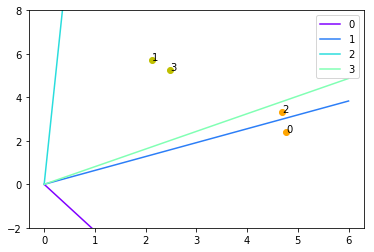

In [ ]:
# Let us have a look on the algorithm "in motion".

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"        
        ax.scatter(train_data[index][0], 
                   train_data[index][1],
                   color=color)
        ax.annotate(str(counter), 
                    (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
plt.show()

Each of the points in the diagram above cause a change in the weights. We see them numbered in the order of their appearance and the corresponding straight line. This way we can see how the networks "learns".

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


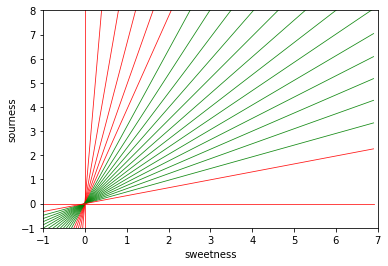

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """ 
        returns tuple (d, pos)
        d is the distance
        If pos == -1 point is below the line, 
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        #print(y)
        print(b)
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance

orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    #print(x)
    slope = np.tan(np.arccos(x))
    #print(slope)
    dist4line1 = create_distance_function(slope, -1, 0)
    #print(dist4line1)
    Y = slope * X
    results = []

    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
    #print(results)

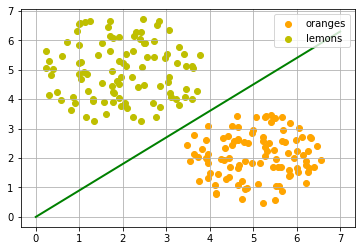

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()

array([6.26765438, 5.06235429, 4.73712982, 3.91655753, 3.63460958,
       5.40773705, 5.65186691, 5.50105834, 5.62928108, 4.19302401,
       3.91629729, 5.28988205, 3.96826748, 4.35540642, 5.51396698,
       5.28073029, 5.22141734, 3.64364878, 5.82547247, 3.95752793,
       5.22802031, 4.64541491, 6.12965773, 5.14990656, 6.00175734,
       5.27675896, 5.31910683, 5.53284673, 4.52133452, 6.01694432,
       4.82235461, 3.95390166, 4.61669362, 4.13012981, 6.32618251,
       4.65470159, 4.32196254, 5.48488329, 5.65122981, 6.04990209,
       6.26269394, 4.26441685, 5.93503055, 3.46773206, 3.73496063,
       4.99534664, 5.273816  , 6.40536385, 5.73155694, 6.45874655,
       4.44128037, 4.37608149, 5.50527571, 4.74457559, 5.98827553,
       6.55891347, 5.3742811 , 5.44733033, 5.41528626, 3.92623167,
       4.78118219, 5.83870804, 6.02902931, 6.21902735, 5.8199929 ,
       4.65163644, 4.88398435, 5.2259429 , 5.68928356, 4.01121116,
       4.85056572, 4.43851887, 5.66538548, 6.20913147, 4.65246

[(6.049902093318299, 3.010119116589132, 0), (5.935030553794445, 1.9871403695051668, 0), (1.0039418262683837, 6.544882518818315, 1), (4.964211347888926, 2.8521586846596776, 0), (2.0670485148233126, 5.525064609725629, 1), (1.3419670493198925, 3.2553257013030406, 1), (5.319106833656101, 2.2492755415077825, 0), (5.118826564356001, 1.1150632094977084, 0), (4.654701587308848, 2.5973072202316105, 0), (4.807255045408332, 0.9393311942140776, 0), (3.6436487836598195, 2.145385329981008, 0), (2.5628892993526646, 5.43170701322438, 1), (5.415286264551378, 3.4604953125726605, 0), (5.407737047386694, 3.2374094581723583, 0), (5.5602828861261715, 1.7059770611325935, 0), (3.9165575334249665, 1.9922643960913677, 0), (2.4371780460788677, 5.093585653912693, 1), (4.294452100110949, 2.6913505671497804, 0), (2.865106160382074, 4.4447233426706525, 1), (3.4555043600043365, 5.126914931376197, 1), (2.8652087859036004, 3.724547126688389, 1), (2.68820977189831, 3.8716267207708643, 1), (5.374281098846284, 2.507554992

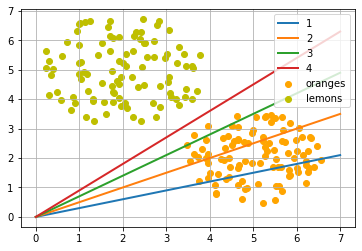

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle
slope = 0.1

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

fruits = list(zip(oranges_x, 
                  oranges_y, 
                  repeat(0, len(oranges_x)))) 
fruits += list(zip(lemons_x, 
                   lemons_y, 
                   repeat(1, len(oranges_x))))

shuffle(fruits)
print(fruits)
learning_rate = 0.2

line = None
counter = 0
for x, y, label in fruits:
    
    res = slope * x - y
    if label == 0 and res < 0:
        # point is above line but should be below 
        # => increment slope
        slope += learning_rate
        counter += 1
        ax.plot(X, slope * X, 
                linewidth=2, label=str(counter))
        
    elif label == 1 and res > 1:
        # point is below line but should be above 
        # => decrement slope
        slope -= learning_rate
        counter += 1
        ax.plot(X, slope * X,  
                linewidth=2, label=str(counter))

ax.legend()
ax.grid()
plt.show()

#print(slope)
#print(len(fruits))

In [ ]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, 
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])

[(1.7142232694144317, 6.131835577762911), (1.2372931222556336, 6.651557875325379), (4.995346638109806, 2.9492252768296185), (2.7958187758404596, 6.5161717326756845), (3.634609583707298, 2.7978681120466398), (1.77275786063912, 6.092693763300225), (3.5926800737338898, 4.0190434284690735), (2.05377540190833, 3.855795575927692), (6.267654378443874, 1.5265143514150243), (1.15882146355588, 3.385225592493864)] [1, 1, 0, 1, 0, 1, 1, 1, 0, 1]


In [ ]:

import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

print(p.weights)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
#evaluation = p.evaluate(train_data, train_labels)
#print(evaluation.most_common())
#evaluation = p.evaluate(test_data, test_labels)
#print(evaluation.most_common())

print(p.weights)

[0.1 0.1]
[-1.84053364  2.41829665]


In [ ]:
### Perceptron for the AND Function

[]

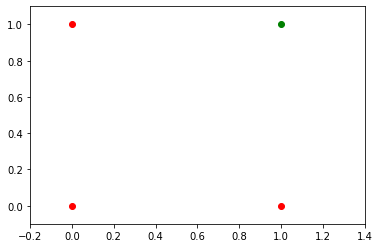

In [ ]:
# In our next example we will program a Neural Network in Python which implements the logical "And" function. It is defined for two inputs in the following way:
# We learned in the previous chapter that a neural network with one perceptron and two input values can be interpreted as a decision boundary, i.e. straight line dividing two classes. The two classes we want to classify in our example look like this:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

[]

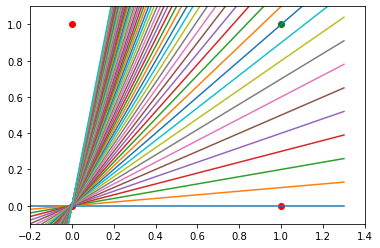

In [ ]:
# We also found out that such a primitive neural network is only capable of creating straight lines going through the origin. So dividing lines like this:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
    ax.plot(X, m * X )
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

In [ ]:
#We can see that none of these straight lines can be used as decision boundary nor any other lines going through the origin.
#We need a line

y=m⋅x+c

#where the intercept c is not equal to 0.

# For example the line

y=−x+1.2

# could be used as a separating line for our problem:

[]

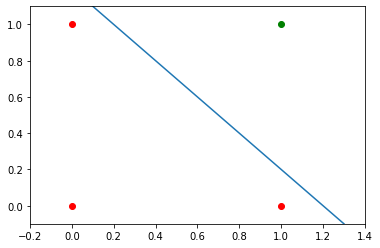

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()

#####The question now is whether we can find a solution with minor modifications of our network model? Or in other words: Can we create a perceptron capable of defining arbitrary decision boundaries?
#The solution consists in the addition of a bias node.

#### Single Perceptron with a Bias

##### A perceptron with two input values and a bias corresponds to a general straight line. With the aid of the bias value b we can train a network which has a decision boundary with a non zero intercept c.

![](https://www.python-course.eu/images/perceptron_two_inputs_and_bias.png)

In [ ]:
#While the input values can change, a bias value always remains constant. Only the weight of the bias node can be adapted.
#Now, the linear equation for a perceptron contains a bias:

∑i=1nwi⋅xi+wn+1⋅b=0

#In our case it looks like this:

w1⋅x1+w2⋅x2+w3⋅b=0

#this is equivalent with

x2=−w1w2⋅x1−w3w2⋅b

This means:
m=−w1w2
and
c=−w3w2⋅b

In [ ]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 bias=1,
                 learning_rate=0.3):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
      if  x <= 0:
        return 0
      else:
        return 1

    def __call__(self, in_data):
      in_data = np.concatenate( (in_data, [self.bias]))
      result = self.weights @ in_data
      return Perceptron.unit_step_function(result)


    def adjust(self, 
               target_result, 
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate( (in_data, [self.bias]) )
            correction = error * in_data * self.learning_rate
            self.weights += correction
    

    def evaluate(self, data, labels):
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample) # predict
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
  

In [ ]:
#We assume that the above Python code with the Perceptron class is stored in your current working directory under the name 'perceptrons.py'.

import numpy as np
#from perceptrons import Perceptron

def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2,))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)

p = Perceptron(weights=[0.3, 0.3, 0.3], learning_rate=0.2)

for in_data, label in labelled_samples(30):
    #print(in_data)
    #print(type(in_data))
    #print(label)
    p.adjust(label, in_data)

test_data, test_labels = list(zip(*labelled_samples(30)))

evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 30})


In [ ]:
p.weights

array([ 0.1,  0.3, -0.3])

-3.0000000000000004 3.0000000000000013


[]

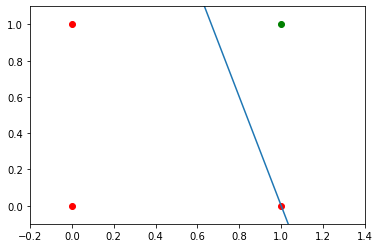

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)

ax.plot(X, m * X + c )
plt.plot()

In [ ]:
# We will create another example with linearly separable data sets, which need a bias node to be separable. We will use the make_blobs function from sklearn.datasets:

from sklearn.datasets import make_blobs

n_samples = 250
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9]), 
                             random_state=0)

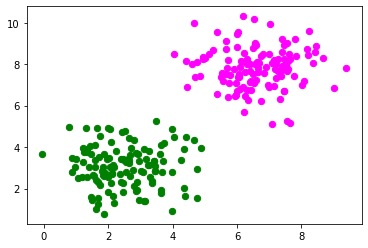

In [ ]:
# Let us visualize the previously created data:

import matplotlib.pyplot as plt

colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()


for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))

In [ ]:
n_learn_data = int(n_samples * 0.8) # 80 % of available data points
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]

#from perceptrons import Perceptron

p = Perceptron(weights=[0.3, 0.3, 0.3], learning_rate=0.8)

for sample, label in zip(learn_data, learn_labels):
    p.adjust(label,sample)

evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)

Counter({'correct': 200})


-1.5513529034664024 11.736643489707035


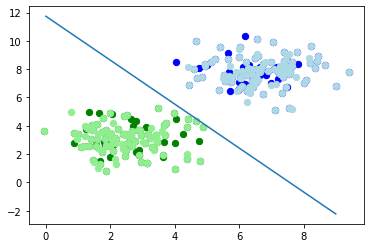

In [ ]:
# Let us visualize the decision boundary:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
    ax.scatter(learn_data[learn_labels==n_class][:, 0], 
               learn_data[learn_labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
    
# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0], 
               test_data[test_labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))


    
X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()

In [ ]:
# In the following section, we will introduce the XOR problem for neural networks. It is the simplest example of a non linearly separable neural network. It can be solved with an additional layer of neurons, which is called a hidden layer.

# The XOR Problem for Neural Networks

#The XOR (exclusive or) function is defined by the following truth table:

# Input1	Input2	XOR Output
0	0	0
0	1	1
1	0	1
1	1	0

#This problem can't be solved with a simple neural network, as we can see in the following diagram:


![](https://www.python-course.eu/images/xor_problem_1.png)


![](https://www.python-course.eu/images/xor_problem_2.png)


In [ ]:
# To solve this problem, we need to introduce a new type of neural networks, a network with so-called hidden layers. A hidden layer allows the network to reorganize or rearrange the input data.


![](https://www.python-course.eu/images/simple_ANN_with_hidden_layer.png)


In [ ]:
# We will need only one hidden layer with two neurons. One works like an AND gate and the other one like an OR gate. The output will "fire", when the OR gate fires and the AND gate doesn't.
# As we had already mentioned, we cannot find a line which separates the orange points from the blue points. But they can be separated by two lines, e.g. L1 and L2 in the following diagram:

![](https://www.python-course.eu/images/xor_problem_3.png)


![](https://www.python-course.eu/images/xor_problem_solution1.png)


![](https://www.python-course.eu/images/xor_problem_solution2.png)


In [ ]:
# We could extend the logical AND to float values between 0 and 1 in the following way:

Input1	Input2	Output
x1 < 0.5	x2 < 0.5	0
x1 < 0.5	x2 >= 0.5	0
x1 >= 0.5	x2 < 0.5	0
x1 >= 0.5	x2 >= 0.5	0

#Try to train a neural network with only one perceptron. Why doesn't it work?

#A point belongs to a class 0, if x1<0.5 and belongs to class 1, if x1>=0.5. Train a network with one perceptron to classify arbitrary points. What can you say about the dicision boundary? What about the input values x2

In [ ]:
#from perceptrons import Perceptron

p = Perceptron(weights=[0.3, 0.3, 0.3],
               bias=1,
               learning_rate=0.2)

def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)

for in_data, label in labelled_samples(30):
    p.adjust(label, 
             in_data)

test_data, test_labels = list(zip(*labelled_samples(60)))

evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 56, 'wrong': 4})


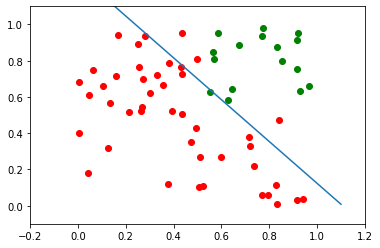

In [ ]:
# The easiest way to see, why it doesn't work, is to visualize the data.

import matplotlib.pyplot as plt
import numpy as np

ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [ ]:
# We can see that the green points and the red points are not separable by one straight line.

In [ ]:
import numpy as np
from collections import Counter

def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 0) if s[0] < 0.5 else (s, 1)


p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.4)

for in_data, label in labelled_samples(300):
    p.adjust(label, 
             in_data)

test_data, test_labels = list(zip(*labelled_samples(500)))

print(p.weights)
p.evaluate(test_data, test_labels)

[ 1.84372572 -0.32977169 -0.9       ]


Counter({'correct': 453, 'wrong': 47})

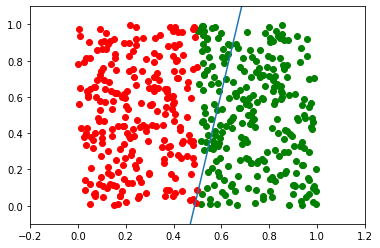

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [ ]:
p.weights, m

#The slope m will have to get larger and larger in situations like this.

(array([ 1.84372572, -0.32977169, -0.9       ]), 5.590915703160016)

#### Structure, weights and matrices

We introduced the basic ideas about neural networks in the previous chapter of our machine learning tutorial.

We have pointed out the similarity between neurons and neural networks in biology. We also introduced very small articial neural networks and introduced decision boundaries and the XOR problem.

In the simple examples we introduced so far, we saw that the weights are the essential parts of a neural network. Before we start to write a neural network with multiple layers, we need to have a closer look at the weights.

We have to see how to initialize the weights and how to efficiently multiply the weights with the input values.

In the following chapters we will design a neural network in Python, which consists of three layers, i.e. the input layer, a hidden layer and an output layer. You can see this neural network structure in the following diagram. We have an input layer with three nodes i1,i2,i3 These nodes get the corresponding input values x1,x2,x3. The middle or hidden layer has four nodes h1,h2,h3,h4. The input of this layer stems from the input layer. We will discuss the mechanism soon. Finally, our output layer consists of the two nodes o1,o2
The input layer is different from the other layers. The nodes of the input layer are passive. This means that the input neurons do not change the data, i.e. there are no weights used in this case. They receive a single value and duplicate this value to their many outputs.

![](https://www.python-course.eu/images/example_network_3_4_2_without_bias.png)

In [ ]:
# The input layer consists of the nodes i1, i2 and i3. In principle the input is a one-dimensional vector, like (2, 4, 11). A one-dimensional vector is represented in numpy like this:

import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)

In [ ]:
# In the algorithm, which we will write later, we will have to transpose it into a column vector, i.e. a two-dimensional array with just one column:

import numpy as np

input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)


The input vector:
 [[ 2]
 [ 4]
 [11]]


In [ ]:
### Weights and matrices

# Each of the arrows in our network diagram has an associated weight value. We will only look at the arrows between the input and the output layer now.

![](https://www.python-course.eu/images/weights_input2hidden_example_values.png)

In [ ]:
# The value x1 going into the node i1 will be distributed according to the values of the weights. In the following diagram we have added some example values. Using these values, the input values (Ih1,Ih2,Ih3,Ih4 into the nodes (h1,h2,h3,h4) of the hidden layer can be calculated like this:

Ih1=0.81∗0.5+0.12∗1+0.92∗0.8
Ih2=0.33∗0.5+0.44∗1+0.72∗0.8
Ih3=0.29∗0.5+0.22∗1+0.53∗0.8
Ih4=0.37∗0.5+0.12∗1+0.27∗0.8

# Those familiar with matrices and matrix multiplication will see where it is boiling down to. We will redraw our network and denote the weights with wij:

![](https://www.python-course.eu/images/weights_input2hidden_1.png)


In order to efficiently execute all the necessary calaculations, we will arrange the weights into a weight matrix. The weights in our diagram above build an array, which we will call 'weights_in_hidden' in our Neural Network class. The name should indicate that the weights are connecting the input and the hidden nodes, i.e. they are between the input and the hidden layer. We will also abbreviate the name as 'wih'. The weight matrix between the hidden and the output layer will be denoted as "who".:

![](https://www.python-course.eu/images/weight_matrix_input.png)

![](https://www.python-course.eu/images/weight_matrix_hidden.png)



Now that we have defined our weight matrices, we have to take the next step. We have to multiply the matrix wih the input vector. 



You might have noticed that something is missing in our previous calculations. We showed in our introductory chapter Neural Networks from Scratch in Python that we have to apply an activation or step function Φ on each of these sums.

The following picture depicts the whole flow of calculation, i.e. the matrix multiplication and the succeeding application of the activation function.
The matrix multiplication between the matrix wih and the matrix of the values of the input nodes x1,x2,x3 calculates the output which will be passed to the activation function.


![](https://www.python-course.eu/images/weights_input2hidden.png)


The final output y1,y2,y3,y4 is the input of the weight matrix who:

Even though treatment is completely analogue, we will also have a detailled look at what is going on between our hidden layer and the output layer:


![](https://www.python-course.eu/images/weights_hidden2output.png)

#### Initializing the weight matrices

One of the important choices which have to be made before training a neural network consists in initializing the weight matrices. We don't know anything about the possible weights, when we start. So, we could start with arbitrary values?
As we have seen the input to all the nodes except the input nodes is calculated by applying the activation function to the following sum:

As we have seen the input to all the nodes except the input nodes is calculated by applying the activation function to the following sum:

yj=∑i=1nwji⋅xi
(with n being the number of nodes in the previous layer and yj is the input to a node of the next layer)

We can easily see that it would not be a good idea to set all the weight values to 0, because in this case the result of this summation will always be zero. This means that our network will be incapable of learning. This is the worst choice, but initializing a weight matrix to ones is also a bad choice.

The values for the weight matrices should be chosen randomly and not arbitrarily. By choosing a random normal distribution we have broken possible symmetric situations, which can and often are bad for the learning process.

There are various ways to initialize the weight matrices randomly. The first one we will introduce is the unity function from numpy.random. It creates samples which are uniformly distributed over the half-open interval [low, high), which means that low is included and high is excluded. Each value within the given interval is equally likely to be drawn by 'uniform'.

In [ ]:
import numpy as np

number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)

# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


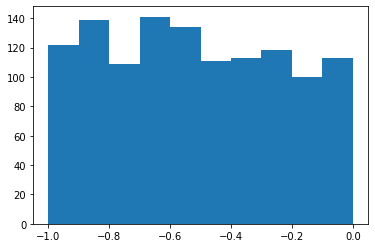

In [ ]:
# The histogram of the samples, created with the uniform function in our previous example, looks like this:

import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

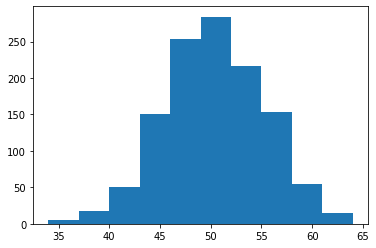

In [ ]:
# The next function we will look at is 'binomial' from numpy.binomial:

# binomial(n, p, size=None)

# It draws samples from a binomial distribution with specified parameters, n trials and probability p of success where n is an integer >= 0 and p is a float in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use)

s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

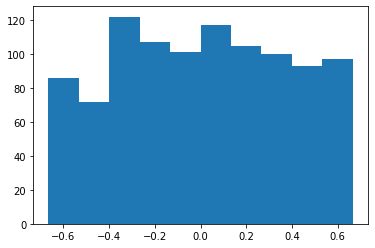

In [ ]:
#We like to create random numbers with a normal distribution, but the numbers have to be bounded. This is not the case with np.random.normal(), because it doesn't offer any bound parameter.
#We can use truncnorm from scipy.stats for this purpose.
#The standard form of this distribution is a standard normal truncated to the range [a, b] — notice that a and b are defined over the domain of the standard normal. To convert clip values for a specific mean and standard deviation, use:

#a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std

from scipy.stats import truncnorm

s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)

plt.hist(s)
plt.show()

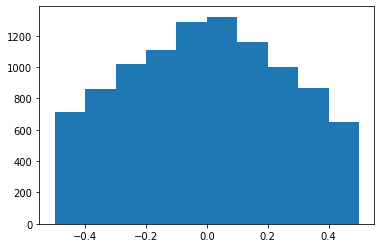

In [ ]:
# The function 'truncnorm' is difficult to use. To make life easier, we define a function truncated_normal in the following to fascilitate this task:

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)

plt.hist(s)
plt.show()

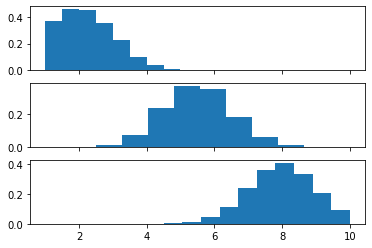

In [ ]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()

In [ ]:
# We will create the link weights matrix now. truncated_normal is ideal for this purpose. It is a good idea to choose random values from within the interval
#(−1n−−√,1n−−√)

#where n denotes the number of input nodes.
#So we can create our "wih" matrix with:

no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[-0.55112178,  0.57346199,  0.50551326],
       [ 0.53854   , -0.01347012, -0.24251467],
       [ 0.55745045,  0.55101259,  0.09515262],
       [ 0.54143718,  0.17447115,  0.21492893]])

In [ ]:
# Similarly, we can now define the "who" weight matrix:

no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes)  # this is the input in this layer!

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[-0.17817573,  0.3269819 ,  0.22092318,  0.44145631],
       [-0.31995317,  0.09779239, -0.28801483,  0.19439632]])

### Running a Neural Network with Python



We learned in the previous chapter of our tutorial on neural networks the most important facts about weights. We saw how they are used and how we can implement them in Python. We saw that the multiplication of the weights with the input values can be accomplished with arrays from Numpy by applying matrix multiplication.

However, what we hadn't done was to test them in a real neural network environment. We have to create this environment first. We will now create a class in Python, implementing a neural network. We will proceed in small steps so that everything is easy to understand.

The most essential methods our class needs are:

__init__ to initialize a class, i.e. we will set the number of neurons for every layer and initialize the weight matrices.
run: A method which is applied to a sample, which which we want to classify. It applies this sample to the neural network. We could say, we 'run' the network to 'predict' the result. This method is in other implementations often known as predict.
train: This method gets a sample and the corresponding target value as an input. With this input it can adjust the weight values if necessary. This means the network learns from an input. Seen from the user point of view, we 'train' the network. In sklearn for example, this method is called fit
We will postpone the definition of the train and run method until later. The weight matrices should be initialized inside of the __init__ method. We do this indirectly. We define a method create_weight_matrices and call it in __init__. In this way, the init method remains clear.

We will also postpone adding bias nodes to the layers.

The following Python code contains an implementation of a neural network class applying the knowledge we worked out in the previous chapter:
---



In [ ]:
import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
   
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes 
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate  
        self.create_weight_matrices()

         
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
        

    def train(self):
        pass
    
    def run(self):
        pass        

We cannot do a lot with this code, but we can at least initialize it. We can also have a look at the weight matrices:

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes = 3, 
                               no_of_out_nodes = 2, 
                               no_of_hidden_nodes = 4,
                               learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[ 0.16379186  0.06011313 -0.15302571]
 [ 0.45475017 -0.31724778  0.30797774]
 [ 0.28319144  0.04135061 -0.25525429]
 [-0.05891287 -0.23247173  0.41167064]]
[[-0.38672941  0.31728956  0.28547084 -0.4301142 ]
 [-0.31227695 -0.21348151 -0.27381275 -0.03849596]]


Activation Functions, Sigmoid and ReLU

Before we can program the run method, we have to deal with the activation function. We had the following diagram in the introductory chapter on neural networks:

![](https://www.python-course.eu/images/neuron_neural_network_detailled_view.png)

In [ ]:
The input values of a perceptron are processed by the summation function and followed by an activation function, transforming the output of the summation function into a desired and more suitable output. The summation function means that we will have a matrix multiplication of the weight vectors and the input values.

There are lots of different activation functions used in neural networks. One of the most comprehensive overviews of possible activation functions can be found at Wikipedia.

The sigmoid function is one of the often used activation functions. The sigmoid function, which we are using, is also known as the Logistic function.

It is defined as
σ(x)=11+e−x

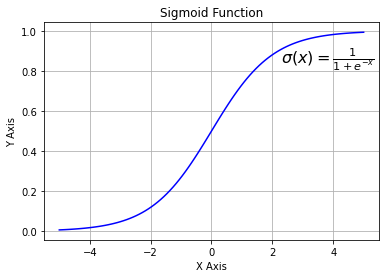

In [ ]:
# let us have a look at the graph of the sigmoid function. We use matplotlib to plot the sigmoid function:

import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)


plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)


plt.show()

In [ ]:
#Looking at the graph, we can see that the sigmoid function maps a given number x into the range of numbers between 0 and 1. 0 and 1 not included! As the value of x gets larger, the value of the sigmoid function gets closer and closer to 1 and as x gets smaller, the value of the sigmoid function is approaching 0.
#Instead of defining the sigmoid function ourselves, we can also use the expit function from scipy.special, which is an implementation of the sigmoid function. It can be applied on various data classes like int, float, list, numpy,ndarray and so on. The result is an ndarray of the same shape as the input data x.

from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

In [ ]:
# The logistic function is often often used in neural networks to introduce nonlinearity in the model and to map signals into a specified range, i.e. 0 and 1. It is also well liked because the derivative - needed in backpropagation - is simple.

σ(x)=11+e−x

and its derivative:

σ′(x)=σ(x)(1−σ(x))

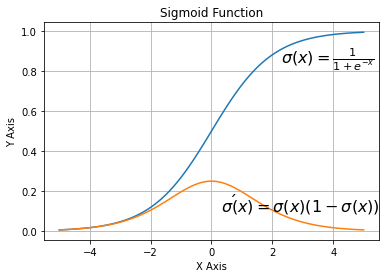

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)

plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)


plt.show()

In [ ]:
# We can also define our own sigmoid function with the decorator vectorize from numpy:

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

Another easy to use activation function is the ReLU function. ReLU stands for rectified linear unit. It is also known as the ramp function. It is defined as the positve part of its argument, i.e. y=max(0,x). This is "currently, the most successful and widely-used activation function is the Rectified Linear Unit (ReLU)"1 The ReLu function is computationally more efficient than Sigmoid like functions, because Relu means only choosing the maximum between 0 and the argument x. Whereas Sigmoids need to perform expensive exponential operations.


In [ ]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)

# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

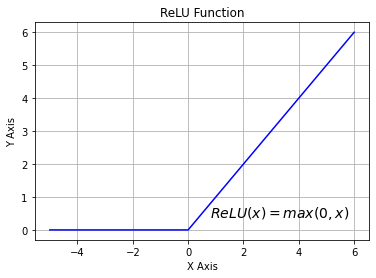

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

In [ ]:
## Adding a run or FIT Method
# We have everything together now to implement the run (or predict) method of our neural network class. We will use scipy.special as the activation function and rename it to activation_function:

# from scipy.special import expit as activation_function

# All we have to do in the run method consists of the following.

   - Matrix multiplication of the input vector and the weights_in_hidden matrix.
   - Applying the activation function to the result of step 1
   - Matrix multiplication of the result vector of step 2 and the weights_in_hidden matrix.
   - To get the final result: Applying the activation function to the result of 3

In [ ]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
    

class NeuralNetwork:
           
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    
    def train(self, input_vector, target_vector):
        pass
            
    
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'. 
        'input_vector' can be tuple, list or ndarray
        """
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector

In [ ]:
#We can instantiate an instance of this class, which will be a neural network. In the following example we create a network with two input nodes, four hidden nodes, and two output nodes.

simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=4,
                               learning_rate=0.6)
#We can apply the run method to all arrays with a shape of (2,), also lists and tuples with two numerical elements. The result of the call is defined by the random values of the weights:

simple_network.run([(3, 4)])

array([[0.5418742 ],
       [0.48816723]])

<a id="bpp"></a>

### Backpropagation




We already wrote in the previous chapters of our tutorial on Neural Networks in Python. The networks from our chapter Running Neural Networks lack the capabilty of learning. They can only be run with randomly set weight values. So we cannot solve any classification problems with them. However, the networks in Chapter Simple Neural Networks were capable of learning, but we only used linear networks for linearly separable classes.

Of course, we want to write general ANNs, which are capable of learning. To do so, we will have to understand backpropagation. Backpropagation is a commonly used method for training artificial neural networks, especially deep neural networks. Backpropagation is needed to calculate the gradient, which we need to adapt the weights of the weight matrices. The weight of the neuron (nodes) of our network are adjusted by calculating the gradient of the loss function. For this purpose a gradient descent optimization algorithm is used. It is also called backward propagation of errors.

Quite often people are frightened away by the mathematics used in it. We try to explain it in simple terms.


Explaining gradient descent starts in many articles or tutorials with mountains. Imagine you are put on a mountain, not necessarily the top, by a helicopter at night or heavy fog. Let's further imagine that this mountain is on an island and you want to reach sea level. You have to go down, but you hardly see anything, maybe just a few metres. Your task is to find your way down, but you cannot see the path. You can use the method of gradient descent. This means that you are examining the steepness at your current position. You will proceed in the direction with the steepest descent. You take only a few steps and then you stop again to reorientate yourself. This means you are applying again the previously described procedure, i.e. you are looking for the steepest descend.

This procedure is depicted in the following diagram in a two-dimensional space.


![](https://www.python-course.eu/images/gradual_descent__mountain.png)


Going on like this you will arrive at a position, where there is no further descend.

Each direction goes upwards. You may have reached the deepest level - the global minimum -, but you might as well be stuck in a basin. If you start at the position on the right side of our image, everything works out fine, but from the leftside, you will be stuck in a local minimum.



Backpropagation in Detail

Now, we have to go into the details, i.e. the mathematics.

We will start with the simpler case. We look at a linear network. Linear neural networks are networks where the output signal is created by summing up all the weighted input signals. No activation function will be applied to this sum, which is the reason for the linearity.

The will use the following simple network.

![](https://www.python-course.eu/images/backpropagation_example_network.png)


When we are training the network we have samples and corresponding labels. For each output value oi we have a label ti, which is the target or the desired value. If the label is equal to the output, the result is correct and the neural network has not made an error. Principially, the error is the difference between the target and the actual output:

ei=ti−oi


We will later use a squared error function, because it has better characteristics for the algorithm:

ei=12(ti−oi)2



We want to clarify how the error backpropagates with the following example with values:





![](https://www.python-course.eu/images/backpropagation_linear_network_error.png)



We will have a look at the output value o1, which is depending on the values w11, w12, w13 and w14. Let's assume the calculated value (o1) is 0.92 and the desired value (t1) is 1. In this case the error is

e1=t1−o1=1−0.92=0.08

The eror e2 can be calculated like this:

e2=t2−o2=1−0.18=0.82



![](https://www.python-course.eu/images/errors_hidden_layer.png)


Depending on this error, we have to change the weights from the incoming values accordingly. We have four weights, so we could spread the error evenly. Yet, it makes more sense to to do it proportionally, according to the weight values. The larger a weight is in relation to the other weights, the more it is responsible for the error. This means that we can calculate the fraction of the error e1 in w11 as:

e1⋅w11∑4i=1w1i


This means in our example:

0.08⋅0.60 / 0.6+0.1+0.15+0.25=0.0343




So, this has been the easy part for linear neural networks. We haven't taken into account the activation function until now.


We want to calculate the error in a network with an activation function, i.e. a non-linear network. The derivation of the error function describes the slope. As we mentioned in the beginning of the this chapter, we want to descend. The derivation describes how the error E changes as the weight wkj changes:

∂E∂wkj
The error function E over all the output nodes oi (i=1,...n) where n is the total number of output nodes:

E=∑i=1n12(ti−oi)2
Now, we can insert this in our derivation:

∂E∂wkj=∂∂wkj12∑i=1n(ti−oi)2

If you have a look at our example network, you will see that an output node ok only depends on the input signals created with the weights wki with i=1,…m and m the number of hidden nodes.

The following diagram further illuminates this:

![](https://www.python-course.eu/images/w_kj.png)

This means that we can calculate the error for every output node independently of each other. This means that we can remove all expressions ti−oi with i≠k from our summation. So the calculation of the error for a node k looks a lot simpler now:

∂E∂wkj=∂∂wkj12(tk−ok)2


The target value tk is a constant, because it is not depending on any input signals or weights. We can apply the chain rule for the differentiation of the previous term to simplify things:

∂E∂wkj=∂E∂ok⋅∂ok∂wkj

In the previous chapter of our tutorial, we used the sigmoid function as the activation function:

σ(x)=1 / 1+e−x


The output node ok is calculated by applying the sigmoid function to the sum of the weighted input signals. This means that we can further transform our derivative term by replacing ok by this function:

∂E∂wkj=(tk−ok)⋅∂∂wkjσ(∑i=1mwkihi)
where m is the number of hidden nodes.


The sigmoid function is easy to differentiate:

∂σ(x)∂x=σ(x)⋅(1−σ(x))
The complete differentiation looks like this now:

∂E∂wkj=(tk−ok)⋅σ(∑i=1mwkihi)⋅(1−σ(∑i=1mwkihi))∂∂wkj∑i=1mwkihi
The last part has to be differentiated with respect to wkj. This means that the derivation of all the products will be 0 except the the term wkjhj) which has the derivative hj with respect to wkj:

∂E∂wkj=(tk−ok)⋅σ(∑i=1mwkihi)⋅(1−σ(∑i=1mwkihi))⋅hj
This is what we need to implement the method 'train' of our NeuralNetwork class in the following chapter.

### Training

In the chapter "Running Neural Networks", we programmed a class in Python code called 'NeuralNetwork'. The instances of this class are networks with three layers. When we instantiate an ANN of this class, the weight matrices between the layers are automatically and randomly chosen. It is even possible to run such a ANN on some input, but naturally it doesn't make a lot of sense exept for testing purposes. Such an ANN cannot provide correct classification results. In fact, the classification results are in no way adapted to the expected results. The values of the weight matrices have to be set according the the classification task. We need to improve the weight values, which means that we have to train our network. To train it we have to implement backpropagation in the train method. If you don't understand backpropagation and want to understand it, we recommend to go back to the chapter Backpropagation in Neural Networks.

After knowing und hopefully understanding backpropagation, you are ready to fully understand the train method.



The train method is called with an input vector and a target vector. The shape of the vectors can be one-dimensional, but they will be automatically turned into the correct two-dimensional shape, i.e. reshape(input_vector.size, 1) and reshape(target_vector.size, 1). After this we call the run method to get the result of the network output_vector_network = self.run(input_vector). This output may differ from the target_vector. We calculate the output_error by subtracting the output of the network output_vector_network from the target_vector.

In [ ]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
        
    
    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuples, lists or ndarrays
        """
        # make sure that the vectors have the right shape
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)

        output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        
        output_error = target_vector - output_vector_network
        tmp = output_error * output_vector_network * (1.0 - output_vector_network)    
        self.weights_hidden_out += self.learning_rate  * (tmp @ output_vector_hidden.T)

        # calculate hidden errors:
        hidden_errors = self.weights_hidden_out.T @ output_error
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)  
    
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'. 
        'input_vector' can be tuple, list or ndarray
        """
        # make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        return output_vector_network

In [ ]:
#We assume that you save the previous code in a file called neural_networks1.py. We will use it under this name in the coming examples.
#To test this neural network class we need train and test data. We create the data with make_blobs from sklearn.datasets.

from sklearn.datasets import make_blobs

n_samples = 300
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2, 6], [6, 2]), 
                             random_state=0)

In [ ]:
#We are going to create a train and a test data set:

size_of_learn_sample = int(n_samples * 0.8)
learn_data = samples[:size_of_learn_sample]
test_data = samples[-size_of_learn_sample:]

# We create a neural network with two input nodes, two hidden nodes and one output node:

#from neural_networks1 import NeuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=1, 
                               no_of_hidden_nodes=5,
                               learning_rate=0.3)

In [ ]:
#The next step consists in training our network with the samples from our training samples:

for i in range(size_of_learn_sample):
    simple_network.train(learn_data[i], labels[i])

#We now have to check how well our network has learned. The network has only one output neuron. This means that the values will be between 0 and 1. If the output values were ideal, which they cannot be, the output values would be one for class 1 and 0 for class 0. Due to the sigmoid function 0 and and will not be even a possible result. So we have to assign result to the values between 0 and 1. We use 0.5 as a threshold. Everything greater or equal than 0.5 is considered to be 1 and everything smaller is taken as a 0. Now we are capable of comparing the results with the labels

In [ ]:
from collections import Counter

evaluation = Counter()
for i in range(size_of_learn_sample):
    point, label = learn_data[i], labels[i]
    res = simple_network.run(point)
    if label == 1:
        if res >= 0.5:
            evaluation["correct"] += 1
        else:
            evaluation["wrong"] += 1
    elif label == 0:
        if res <= 0.5:
            evaluation["correct"] += 1
        else:
            evaluation["wrong"] += 1
print(evaluation)

Counter({'wrong': 120, 'correct': 120})


In [ ]:
#The flaw in the design above is this: If we have a value of 0.5 or close to this, the classifier is rather undecided. The result is in the middle between two possible results.

from collections import Counter

def evaluate(data, labels, threshold=0.5):
    evaluation = Counter()
    for i in range(len(data)):
        point, label = data[i], labels[i]
        res = simple_network.run(point)
        if threshold < res < 1 - threshold:
            evaluation["undecided"] += 1
        elif label == 1:
            if res >= 1 - threshold:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        elif label == 0:
            if res <= threshold:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
    return evaluation

                
res = evaluate(learn_data, labels)
res

Counter({'correct': 120, 'wrong': 120})

In [ ]:
# Neural Network with Bias Nodes


We already introduced the basic idea and necessity of bias node in the chapter "Simple Neural Network", 
in which we focussed on very simple linearly separable data sets. We learned that a bias node is a node that is always returning the same output. In other words: It is a node which is not depending on some input and it does not have any input. The value of a bias node is often set to one, but it can be set to other values as well. Except for zero, which makes no sense for obvious reasons. If a neural network does not have a bias node in a given layer, it will not be able to produce output in the next layer that differs from 0 when the feature values are 0. Generally speaking, we can say that bias nodes are used to increase the flexibility of the network to fit the data. Usually, there will be not more
 than one bias node per layer. The only exception is the output layer, because it makes no sense to add a bias node to this layer.

![](https://www.python-course.eu/images/weights_input2hidden_bias.png)

We can see from this diagram that our weight matrix needs one additional column and the bias value has to be added to the input vector:



![](https://www.python-course.eu/images/weight_input_matrix_multiplication_bias.png)



Again, the situation for the weight matrix between the hidden and the output layer is similar:





![](https://www.python-course.eu/images/weights_hidden2output_bias.png)



The same is true for the corresponding matrix:


![](https://www.python-course.eu/images/weight_hidden_matrix_multiplication_bias.png)

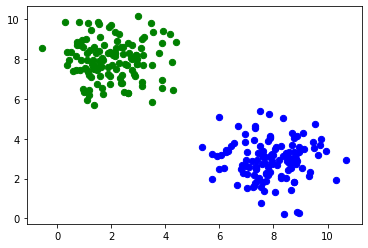

In [ ]:
# The following is a complete Python class implementing our network with bias nodes:

import numpy as np
from scipy.stats import truncnorm

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
    

class NeuralNetwork:
            
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None):  
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
    
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural 
        network with optional bias nodes"""   
        bias_node = 1 if self.bias else 0 
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                        self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                         self.no_of_hidden_nodes + bias_node))

        
    def train(self, input_vector, target_vector):
        """ input_vector and target_vector can be tuple, list or ndarray """

        # make sure that the vectors have the right shap
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)        
        if self.bias:
            # adding bias node to the end of the input_vector
            input_vector = np.concatenate( (input_vector, [[self.bias]]) )
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)

        output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) ) 
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        
        output_error = target_vector - output_vector_network  
        # update the weights:
        tmp = output_error * output_vector_network * (1.0 - output_vector_network)     
        self.weights_hidden_out += self.learning_rate  * (tmp @ output_vector_hidden.T)

        # calculate hidden errors:
        hidden_errors = self.weights_hidden_out.T @ output_error
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        if self.bias:
            x = (tmp @input_vector.T)[:-1,:]     # last row cut off,
        else:
            x = tmp @ input_vector.T
        self.weights_in_hidden += self.learning_rate *  x

           
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'. 
        'input_vector' can be tuple, list or ndarray
        """
        # make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [[1]]) )
        input4hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            input4hidden = np.concatenate( (input4hidden, [[1]]) )
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        return output_vector_network
            
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

data, labels = make_blobs(n_samples=250, 
                             centers=([2.5, 3], [6.7, 7.9]), 
                             random_state=0)

data, labels = make_blobs(n_samples=250, 
                             centers=([2, 7.9], [8, 3]), 
                             random_state=0)

colours = ('green', 'blue', 'red', 'magenta', 'yellow', 'cyan')
fig, ax = plt.subplots()


for n_class in range(2):
    ax.scatter(data[labels==n_class][:, 0], data[labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=10,
                               learning_rate=0.1,
                               bias=1)
    
simple_network.__dict__

{'bias': 1,
 'learning_rate': 0.1,
 'no_of_hidden_nodes': 10,
 'no_of_in_nodes': 2,
 'no_of_out_nodes': 2,
 'weights_hidden_out': array([[ 0.26941196, -0.01997585,  0.28672862, -0.04093959, -0.14280921,
         -0.05934062, -0.26826302,  0.12012418,  0.06644027, -0.00382013,
          0.26553275],
        [ 0.2480301 ,  0.05782807,  0.2189935 , -0.05538357, -0.02518258,
          0.0402508 ,  0.18196787, -0.23013821, -0.10456948, -0.06328227,
         -0.11475722]]),
 'weights_in_hidden': array([[-0.43501034,  0.01057816, -0.46792921],
        [-0.45765353,  0.33604196,  0.02081498],
        [-0.47899684, -0.19868647, -0.26203225],
        [ 0.3005188 ,  0.01189104,  0.34763523],
        [ 0.34948936,  0.15240694, -0.18995716],
        [-0.34469368,  0.43349791, -0.05582405],
        [-0.41400176,  0.10515102, -0.54367979],
        [ 0.29281351, -0.29617842, -0.35219619],
        [ 0.22781509, -0.11408715,  0.29116765],
        [-0.03005796, -0.29423357,  0.29627065]])}

In [ ]:
import numpy as np
labels_one_hot = (np.arange(2) == labels.reshape(labels.size, 1))
labels_one_hot = labels_one_hot.astype(np.float)

for i in range(len(data)):
    simple_network.train(data[i], labels_one_hot[i])

    
simple_network.evaluate(data, labels)

(250, 0)

Softmax

The previous implementations of neural networks in our tutorial returned float values in the open interval (0, 1). To make a final decision we had to interprete the results of the output neurons. The one with the highest value is a likely candidate but we also have to see it in relation to the other results. It should be obvious that in a two classes case (c1 and c2) a result (0.013, 0.95) is a clear vote for the class c2 but (0.73, 0.89) on the other hand is a different thing. We could say in this situation 'c2 is more likely than c1, but c1 has still a high likelihood'. Talking about likelihoods: The return values are not probabilities. It would be a lot better to have a normalized output with a probability function. Here comes the softmax function into the picture. The softmax function, also known as softargmax or normalized exponential function, is a function that takes as input a vector of n real numbers, and normalizes it into a probability distribution consisting of n probabilities proportional to the exponentials of the input vector. A probability distribution implies that the result vector sums up to 1. Needless to say, if some components of the input vector are negative or greater than one, they will be in the range (0, 1) after applying Softmax . The Softmax function is often used in neural networks, to map the results of the output layer, which is non-normalized, to a probability distribution over predicted output classes.

In [ ]:
import numpy as np

def softmax(x):
    """ applies softmax to an input x"""
    e_x = np.exp(x)
    return e_x / e_x.sum()

x = np.array([1, 0, 3, 5])
y = softmax(x)
y, x / x.sum()

(array([0.01578405, 0.00580663, 0.11662925, 0.86178007]),
 array([0.11111111, 0.        , 0.33333333, 0.55555556]))

In [ ]:
# Avoiding underflow or overflow errors due to floating point instability:

import numpy as np

def softmax(x):
    """ applies softmax to an input x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

softmax(x)

array([0.01578405, 0.00580663, 0.11662925, 0.86178007])

In [ ]:
import numpy as np

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

s = softmax(np.array([0, 4, 5]))

si_sj = - s * s.reshape(3, 1)
print(s)
print(si_sj)
s_der = np.diag(s) + si_sj
s_der

[0.00490169 0.26762315 0.72747516]
[[-2.40265555e-05 -1.31180548e-03 -3.56585701e-03]
 [-1.31180548e-03 -7.16221526e-02 -1.94689196e-01]
 [-3.56585701e-03 -1.94689196e-01 -5.29220104e-01]]


array([[ 0.00487766, -0.00131181, -0.00356586],
       [-0.00131181,  0.196001  , -0.1946892 ],
       [-0.00356586, -0.1946892 ,  0.19825505]])

(1, 4) [[0.24794264]
 [0.75205736]] 1.0
(2, 6) [[0.23659567]
 [0.76340433]] 1.0
(3, 3) [[0.26767871]
 [0.73232129]] 1.0
(6, 2) [[0.29311966]
 [0.70688034]] 1.0


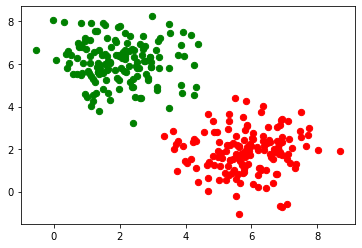

In [ ]:
import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()


class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 softmax=True):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.softmax = softmax
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
        
    
    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuples, lists or ndarrays
        """
        # make sure that the vectors have the right shape
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)

        output_vector_hidden = sigmoid(self.weights_in_hidden @ input_vector)
        if self.softmax:
            output_vector_network = softmax(self.weights_hidden_out @ output_vector_hidden)
        else:
            output_vector_network = sigmoid(self.weights_hidden_out @ output_vector_hidden)
            
        output_error = target_vector - output_vector_network
        if self.softmax:
            ovn = output_vector_network.reshape(output_vector_network.size,)
            si_sj = - ovn * ovn.reshape(self.no_of_out_nodes, 1)
            s_der = np.diag(ovn) + si_sj
            tmp =  s_der @ output_error   
            self.weights_hidden_out += self.learning_rate  * (tmp @ output_vector_hidden.T)
        else:    
            tmp = output_error * output_vector_network * (1.0 - output_vector_network)    
            self.weights_hidden_out += self.learning_rate  * (tmp @ output_vector_hidden.T)
            
            
        # calculate hidden errors:
        hidden_errors = self.weights_hidden_out.T @ output_error
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)  
    
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'. 
        'input_vector' can be tuple, list or ndarray
        """
        # make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = sigmoid(self.weights_in_hidden @ input_vector)
        if self.softmax:
            output_vector_network = softmax(self.weights_hidden_out @ input4hidden)
        else:
            output_vector_network = sigmoid(self.weights_hidden_out @ input4hidden)

        return output_vector_network
            
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs        


from sklearn.datasets import make_blobs
n_samples = 300
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2, 6], [6, 2]), 
                             random_state=0)


import matplotlib.pyplot as plt


colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
fig, ax = plt.subplots()


for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
    
size_of_learn_sample = int(n_samples * 0.8)
learn_data = samples[:size_of_learn_sample]
test_data = samples[-size_of_learn_sample:]

#from neural_networks_softmax import NeuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=5,
                               learning_rate=0.3,
                               softmax=True)
for x in [(1, 4), (2, 6), (3, 3), (6, 2)]:
    y = simple_network.run(x)
    print(x, y, s.sum())

### Confusion Matrix

In the previous chapters of our Machine Learning tutorial (Neural Networks with Python and Numpy and Neural Networks from Scratch ) we implemented various algorithms, but we didn't properly measure the quality of the output. The main reason was that we used very simple and small datasets to learn and test. In the chapter Neural Network: Testing with MNIST, we will work with large datasets and ten classes, so we need proper evaluations tools. We will introduce in this chapter the concepts of the confusion matrix:


A confusion matrix is a matrix (table) that can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class. This is the way we keep it in this chapter of our tutorial, but it can be the other way around as well, i.e. rows for predicted classes and columns for actual classes. The name confusion matrix reflects the fact that it makes it easy for us to see what kind of confusions occur in our classification algorithms. For example the algorithms should have predicted a sample as ci because the actual class is ci, but the algorithm came out with cj. In this case of mislabelling the element cm[i,j] will be incremented by one, when the confusion matrix is constructed.

We will define methods to calculate the confusion matrix, precision and recall in the following class.


Accuracy:

AC=TN+TP / TN+FP+FN+TP

The accuracy is not always an adequate performance measure. Let us assume we have 1000 samples. 995 of these are negative and 5 are positive cases. Let us further assume we have a classifier, which classifies whatever it will be presented as negative. The accuracy will be a surprising 99.5%, even though the classifier could not recognize any positive samples.

Recall aka. True Positive Rate:

recall=TP/ FN+TP

True Negative Rate:

TNR=FP/TN+FP

Precision:

precision:TP / FP+TP



## Multi-class Case

To measure the results of machine learning algorithms, the previous confusion matrix will not be sufficient. We will need a generalization for the multi-class case.

Let us assume that we have a sample of 25 animals, e.g. 7 cats, 8 dogs, and 10 snakes, most probably Python snakes. The confusion matrix of our recognition algorithm may look like the following table:

In this confusion matrix, the system correctly predicted six of the eight actual dogs, but in two cases it took a dog for a cat. The seven acutal cats were correctly recognized in six cases but in one case a cat was taken to be a dog. Usually, it is hard to take a snake for a dog or a cat, but this is what happened to our classifier in two cases. Yet, eight out of ten snakes had been correctly recognized. (Most probably this machine learning algorithm was not written in a Python program, because Python should properly recognize its own species :-) )

You can see that all correct predictions are located in the diagonal of the table, so prediction errors can be easily found in the table, as they will be represented by values outside the diagonal.

We can generalize this to the multi-class case. To do this we summarize over the rows and columns of the confusion matrix. Given that the matrix is oriented as above, i.e., that a given row of the matrix corresponds to specific value for the "truth", we have:

Precisioni=Mii∑jMji
Recalli=Mii∑jMij


This means, precision is the fraction of cases where the algorithm correctly predicted class i out of all instances where the algorithm predicted i (correctly and incorrectly). recall on the other hand is the fraction of cases where the algorithm correctly predicted i out of all of the cases which are labelled as i.

Let us apply this to our example:

The precision for our animals can be calculated as

precisiondogs=6/(6+1+1)=3/4=0.75
precisioncats=6/(2+6+1)=6/9=0.67
precisionsnakes=8/(0+0+8)=1


The recall is calculated like this:

recalldogs=6/(6+2+0)=3/4=0.75
recallcats=6/(1+6+0)=6/7=0.86
recallsnakes=8/(1+1+8)=4/5=0.8

In [ ]:
# Example

# We are ready now to code this into Python. The following code shows a confusion matrix for a multi-class machine learning problem with ten labels, so for example an algorithms for recognizing the ten digits from handwritten characters.
#If you are not familiar with Numpy and Numpy arrays, we recommend our tutorial on Numpy.

import numpy as np

cm = np.array(
[[5825,    1,   49,   23,    7,   46,   30,   12,   21,   26],
 [   1, 6654,   48,   25,   10,   32,   19,   62,  111,   10],
 [   2,   20, 5561,   69,   13,   10,    2,   45,   18,    2],
 [   6,   26,   99, 5786,    5,  111,    1,   41,  110,   79],
 [   4,   10,   43,    6, 5533,   32,   11,   53,   34,   79],
 [   3,    1,    2,   56,    0, 4954,   23,    0,   12,    5],
 [  31,    4,   42,   22,   45,  103, 5806,    3,   34,    3],
 [   0,    4,   30,   29,    5,    6,    0, 5817,    2,   28],
 [  35,    6,   63,   58,    8,   59,   26,   13, 5394,   24],
 [  16,   16,   21,   57,  216,   68,    0,  219,  115, 5693]])

In [ ]:
# The functions 'precision' and 'recall' calculate values for a label, whereas the function 'precision_macro_average' the precision for the whole classification problem calculates.

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [ ]:
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")

label precision recall
    0     0.983  0.964
    1     0.987  0.954
    2     0.933  0.968
    3     0.944  0.924
    4     0.947  0.953
    5     0.914  0.980
    6     0.981  0.953
    7     0.928  0.982
    8     0.922  0.949
    9     0.957  0.887


In [ ]:
print("precision total:", precision_macro_average(cm))

print("recall total:", recall_macro_average(cm))

precision total: 0.9496885564052286
recall total: 0.9514531547877969


<a id="mnn"></a>

### MNIST - From Scratch


The MNIST database (Modified National Institute of Standards and Technology database) of handwritten digits consists of a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. Additionally, the black and white images from NIST were size-normalized and centered to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

This database is well liked for training and testing in the field of machine learning and image processing. It is a remixed subset of the original NIST datasets. One half of the 60,000 training images consist of images from NIST's testing dataset and the other half from Nist's training set. The 10,000 images from the testing set are similarly assembled.

The MNIST dataset is used by researchers to test and compare their research results with others. The lowest error rates in literature are as low as 0.21 percent.1



In [ ]:
# Reading the MNIST data set

#The images from the data set have the size 28 x 28. They are saved in the csv data files mnist_train.csv and mnist_test.csv.
#Every line of these files consists of an image, i.e. 785 numbers between 0 and 255.
# The first number of each line is the label, i.e. the digit which is depicted in the image. The following 784 numbers are the pixels of the 28 x 28 image

In [ ]:
!ls

mnist_test.csv	mnist_train.csv  sample_data


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/mnist/"
train_data = np.loadtxt("mnist_train.csv", delimiter=",")
test_data = np.loadtxt("mnist_test.csv", delimiter=",") 
test_data[:10]

In [ ]:
# The images of the MNIST dataset are greyscale and the pixels range between 0 and 255 including both bounding values. We will map these values into an interval from [0.01, 1] by multiplying each pixel by 0.99 / 255 and adding 0.01 to the result. This way, we avoid 0 values as inputs, which are capable of preventing weight updates, as we we seen in the introductory chapter.

fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [ ]:
#We need the labels in our calculations in a one-hot representation. We have 10 digits from 0 to 9, i.e. lr = np.arange(10).
#Turning a label into one-hot representation can be achieved with the command: (lr==label).astype(np.int)
#We demonstrate this in the following:

import numpy as np

lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

In [ ]:
#We are ready now to turn our labelled images into one-hot representations. Instead of zeroes and one, we create 0.01 and 0.99, which will be better for our calculations:

lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

In [ ]:
# Before we start using the MNIST data sets with our neural network, we will have a look at some images:

for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [ ]:
#Dumping the Data for Faster Reload
#You may have noticed that it is quite slow to read in the data from the csv files.
#We will save the data in binary format with the dump function from the pickle module:

import pickle

with open("data/mnist/pickled_mnist.pkl", "bw") as fh:
    data = (train_imgs, 
            test_imgs, 
            train_labels,
            test_labels,
            train_labels_one_hot,
            test_labels_one_hot)
    pickle.dump(data, fh)
    
#We are able now to read in the data by using pickle.load. This is a lot faster than using loadtxt on the csv files:

import pickle

with open("data/mnist/pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)

train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [ ]:
# Classifying the Data
# We will use the following neural network class for our first classification:

import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)
    

class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()    


    def create_weight_matrices(self):
        """ 
        A method to initialize the weight 
        matrices of the neural network
        """
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, 
                                         self.no_of_hidden_nodes))
        

    def train(self, input_vector, target_vector):

        """
        input_vector and target_vector can 
        be tuple, list or ndarray
        """
        
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.wih, 
                                input_vector)
        output_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.who, 
                                output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network \
              * (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp, 
                                           output_hidden.T)
        self.who += tmp

        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, 
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * \
              (1.0 - output_hidden)
        self.wih += self.learning_rate \
                          * np.dot(tmp, input_vector.T)

    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
            
    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm    

    def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs                          


In [ ]:
ANN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                    no_of_out_nodes = 10, 
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.1)
    
    
for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])

NameError: ignored

In [ ]:
for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))

In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))

cm = ANN.confusion_matrix(train_imgs, train_labels)
print(cm)

for i in range(10):
    print("digit: ", i, "precision: ", ANN.precision(i, cm), "recall: ", ANN.recall(i, cm))

In [ ]:
#Multiple Runs
#We can repeat the training multiple times. Each run is called an "epoch".

epochs = 3

NN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                   no_of_out_nodes = 10, 
                   no_of_hidden_nodes = 100,
                   learning_rate = 0.1)


for epoch in range(epochs):  
    print("epoch: ", epoch)
    for i in range(len(train_imgs)):
        NN.train(train_imgs[i], 
                 train_labels_one_hot[i])
  
    corrects, wrongs = NN.evaluate(train_imgs, train_labels)
    print("accuracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = NN.evaluate(test_imgs, test_labels)
    print("accuracy: test", corrects / ( corrects + wrongs))

In [ ]:
#We want to do the multiple training of the training set inside of our network. To this purpose we rewrite the method train and add a method train_single. train_single is more or less what we called 'train' before. Whereas the new 'train' method is doing the epoch counting. For testing purposes, we save the weight matrices after each epoch in
#the list intermediate_weights. This list is returned as the output of train:

import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)

In [ ]:
class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
        
    
    def train_single(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuple, 
        list or ndarray
        """
        
        output_vectors = []
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        
        output_vector1 = np.dot(self.wih, 
                                input_vector)
        output_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.who, 
                                output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * \
              (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp, 
                                           output_hidden.T)
        self.who += tmp


        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, 
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        self.wih += self.learning_rate * np.dot(tmp, input_vector.T)
        

    def train(self, data_array, 
              labels_one_hot_array,
              epochs=1,
              intermediate_results=False):
        intermediate_weights = []
        for epoch in range(epochs):  
            print("*", end="")
            for i in range(len(data_array)):
                self.train_single(data_array[i], 
                                  labels_one_hot_array[i])
            if intermediate_results:
                intermediate_weights.append((self.wih.copy(), 
                                             self.who.copy()))
        return intermediate_weights        
            
    def confusion_matrix(self, data_array, labels):
        cm = {}
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            if (target, res_max) in cm:
                cm[(target, res_max)] += 1
            else:
                cm[(target, res_max)] = 1
        return cm
        
    
    def run(self, input_vector):
        """ input_vector can be tuple, list or ndarray """
        
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
    

So, in the above code:

1) setting up weight matrix

2) setting up training of the network where each sample is trained and weights stored after 1 epoch (that is after all training samples have gone though one cycle, the weights and the epoch numbers are updated), the single training happens in train_single where weights for hidden_output and input_hidden is updated after the model goes through each sample

3) train function stores the weights for each epoch(1 epoch will have all samples in it)

4) Run function will have the final weights from train function because its run after .train(so that the weights are updated)

5) The evaluate function uses the run function


### the same logic is below, with bias nodes and multiple hidden layers

In [ ]:
epochs = 10

ANN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                               no_of_out_nodes = 10, 
                               no_of_hidden_nodes = 100,
                               learning_rate = 0.15)
    
   
weights = ANN.train(train_imgs, 
                    train_labels_one_hot, 
                    epochs=epochs, 
                    intermediate_results=True)



cm = ANN.confusion_matrix(train_imgs, train_labels)
        
print(ANN.run(train_imgs[i]))


for i in range(epochs):  
    print("epoch: ", i)
    ANN.wih = weights[i][0]
    ANN.who = weights[i][1]
   
    corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
    print("accuracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
    print("accuracy: test", corrects / ( corrects + wrongs))

In [ ]:
# With Bias Nodes

import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)

In [ ]:
class NeuralNetwork:
        
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None
                ):  

        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes      
        self.no_of_hidden_nodes = no_of_hidden_nodes     
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
    
        
    
    def create_weight_matrices(self):
        """ 
        A method to initialize the weight 
        matrices of the neural network with 
        optional bias nodes
        """
        
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                          self.no_of_in_nodes + bias_node))

        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, 
                          self.no_of_hidden_nodes + bias_node))
        
        
        
    def train(self, input_vector, target_vector):
        """ 
        input_vector and target_vector can 
        be tuple, list or ndarray
        """
        
        bias_node = 1 if self.bias else 0
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate((input_vector, 
                                           [self.bias]) )
                                    
            
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        
        output_vector1 = np.dot(self.wih, 
                                input_vector)
        output_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_hidden = np.concatenate((output_hidden, 
                                            [[self.bias]]) )
        
        
        output_vector2 = np.dot(self.who, 
                                output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_hidden.T)
        self.who += tmp


        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, 
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:]     
        else:
            x = np.dot(tmp, input_vector.T)
        self.wih += self.learning_rate * x
        
       
    
    def run(self, input_vector):
        """
        input_vector can be tuple, list or ndarray
        """
        
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate((input_vector, [1]) )
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, 
                                             [[1]]) )
            

        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
        return output_vector
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [ ]:
ANN = NeuralNetwork(no_of_in_nodes=image_pixels, 
                    no_of_out_nodes=10, 
                    no_of_hidden_nodes=200,
                    learning_rate=0.1,
                    bias=None)
    
    
for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])
for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))


corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))    

In [ ]:
## Version with Bias and Epochs:

import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd,
                     loc=mean,
                     scale=sd)

In [ ]:
class NeuralNetwork:
 
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None
                ):  

        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        
        self.no_of_hidden_nodes = no_of_hidden_nodes
            
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
    
        
    
    def create_weight_matrices(self):
        """ 
        A method to initialize the weight matrices 
        of the neural network with optional 
        bias nodes"""
        
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                          self.no_of_in_nodes + bias_node))

        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, 
                          self.no_of_hidden_nodes + bias_node))
        
 
    def train_single(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuple, 
        list or ndarray
        """

        bias_node = 1 if self.bias else 0
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, 
                                            [self.bias]) )
        
        output_vectors = []
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        
        output_vector1 = np.dot(self.wih, 
                                input_vector)
        output_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_hidden = np.concatenate((output_hidden, 
                                            [[self.bias]]) )

        
        output_vector2 = np.dot(self.who, 
                                output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * (1.0 - output_network)          
        tmp = self.learning_rate  * np.dot(tmp, 
                                           output_hidden.T) 
        self.who += tmp

        
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, 
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:] 
        else:
            x = np.dot(tmp, input_vector.T)
        self.wih += self.learning_rate * x
        

    def train(self, data_array, 
              labels_one_hot_array,
              epochs=1,
              intermediate_results=False):
        intermediate_weights = []
        for epoch in range(epochs):  
            for i in range(len(data_array)):
                self.train_single(data_array[i], 
                                  labels_one_hot_array[i])
            if intermediate_results:
                intermediate_weights.append((self.wih.copy(), 
                                             self.who.copy()))
        return intermediate_weights      
        

        
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, 
                                            [self.bias]) )
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, 
                                             [[self.bias]]) )
            

        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
    
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [ ]:

epochs = 12

network = NeuralNetwork(no_of_in_nodes=image_pixels, 
                        no_of_out_nodes=10, 
                        no_of_hidden_nodes=100,
                        learning_rate=0.1,
                        bias=None)

weights = network.train(train_imgs, 
                        train_labels_one_hot, 
                        epochs=epochs, 
                        intermediate_results=True) 
for epoch in range(epochs):  
    print("epoch: ", epoch)
    network.wih = weights[epoch][0]
    network.who = weights[epoch][1]
    corrects, wrongs = network.evaluate(train_imgs, 
                                        train_labels)
    print("accuracy train: ", corrects / ( corrects + wrongs))                   
    corrects, wrongs = network.evaluate(test_imgs, 
                                        test_labels)
    print("accuracy test: ", corrects / ( corrects + wrongs)) 

In [ ]:
epochs = 12


with open("nist_tests.csv", "w") as fh_out:  
    for hidden_nodes in [20, 50, 100, 120, 150]:
        for learning_rate in [0.01, 0.05, 0.1, 0.2]:
            for bias in [None, 0.5]:
                network = NeuralNetwork(no_of_in_nodes=image_pixels, 
                                       no_of_out_nodes=10, 
                                       no_of_hidden_nodes=hidden_nodes,
                                       learning_rate=learning_rate,
                                       bias=bias)
                weights = network.train(train_imgs, 
                                       train_labels_one_hot, 
                                       epochs=epochs, 
                                       intermediate_results=True) 
                for epoch in range(epochs):  
                    print("*", end="")
                    network.wih = weights[epoch][0]
                    network.who = weights[epoch][1]
                    train_corrects, train_wrongs = network.evaluate(train_imgs, 
                                                                    train_labels)
                    
                    test_corrects, test_wrongs = network.evaluate(test_imgs, 
                                                                  test_labels)
                    outstr = str(hidden_nodes) + " " + str(learning_rate) + " " + str(bias) 
                    outstr += " " + str(epoch) + " "
                    outstr += str(train_corrects / (train_corrects + train_wrongs)) + " "
                    outstr += str(train_wrongs / (train_corrects + train_wrongs)) + " "
                    outstr += str(test_corrects / (test_corrects + test_wrongs)) + " "
                    outstr += str(test_wrongs / (test_corrects + test_wrongs)) 
                    
                    fh_out.write(outstr + "\n" )
                    fh_out.flush()


In [ ]:
from scipy.stats import truncnorm
a, b = 0.1, 2
r = truncnorm.rvs(a, b, size=10)
a, b = 0.1, 2
r

array([1.15240077, 1.61190255, 1.67895239, 0.20673539, 0.49145456,
       1.37142258, 0.61435577, 1.65742488, 0.81815654, 0.44936201])

In [ ]:
## Networks with multiple hidden layers

# We will write a new neural network class, in which we can define an arbitrary number of hidden layers. The code is also improved, because the weight matrices are now build inside of a loop instead redundant code:

import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)


class NeuralNetwork:
        
    
    def __init__(self, 
                 network_structure, # ie. [input_nodes, hidden1_nodes, ... , hidden_n_nodes, output_nodes]
                 learning_rate,
                 bias=None
                ):  

        self.structure = network_structure
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
    

     
    def create_weight_matrices(self):
        
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        
        layer_index = 1
        no_of_layers = len(self.structure)
        while layer_index < no_of_layers:
            nodes_in = self.structure[layer_index-1]
            nodes_out = self.structure[layer_index]
            n = (nodes_in + bias_node) * nodes_out
            rad = 1 / np.sqrt(nodes_in)
            X = truncated_normal(mean=2, 
                                 sd=1, 
                                 low=-rad, 
                                 upp=rad)
            wm = X.rvs(n).reshape((nodes_out, nodes_in + bias_node))
            self.weights_matrices.append(wm)
            layer_index += 1


    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuple, 
        list or ndarray
        """                              

        no_of_layers = len(self.structure)
        input_vector = np.array(input_vector, ndmin=2).T
        layer_index = 0
        # The output/input vectors of the various layers:
        res_vectors = [input_vector]
        while layer_index < no_of_layers - 1:
            in_vector = res_vectors[-1]
            if self.bias:
                # adding bias node to the end of the 'input'_vector
                in_vector = np.concatenate( (in_vector, 
                                             [[self.bias]]) )
                res_vectors[-1] = in_vector
            x = np.dot(self.weights_matrices[layer_index], 
                       in_vector)
            out_vector = activation_function(x)
            # the output of one layer is the input of the next one:
            res_vectors.append(out_vector)    
            layer_index += 1



        layer_index = no_of_layers - 1
        target_vector = np.array(target_vector, ndmin=2).T
         # The input vectors to the various layers
        output_errors = target_vector - out_vector  
        while layer_index > 0:
            out_vector = res_vectors[layer_index]
            in_vector = res_vectors[layer_index-1]

            if self.bias and not layer_index==(no_of_layers-1):
                out_vector = out_vector[:-1,:].copy()

            tmp = output_errors * out_vector * (1.0 - out_vector)     
            tmp = np.dot(tmp, in_vector.T)
            
            #if self.bias:
            #    tmp = tmp[:-1,:] 
                
            self.weights_matrices[layer_index-1] += self.learning_rate * tmp
            
            output_errors = np.dot(self.weights_matrices[layer_index-1].T, 
                                   output_errors)
            if self.bias:
                output_errors = output_errors[:-1,:]
            layer_index -= 1


       
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray

        no_of_layers = len(self.structure)
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, 
                                            [self.bias]) )
        in_vector = np.array(input_vector, ndmin=2).T

        layer_index = 1
        # The input vectors to the various layers
        while layer_index < no_of_layers:
            x = np.dot(self.weights_matrices[layer_index-1], 
                       in_vector)
            out_vector = activation_function(x)
            
            # input vector for next layer
            in_vector = out_vector
            if self.bias:
                in_vector = np.concatenate( (in_vector, 
                                             [[self.bias]]) )            
            
            layer_index += 1
  
    
        return out_vector


      def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs            

So in the above:

Same happens, but in train function the number of layers are considered and first forward propagation happens, that is the first while loop and from second while loop it iterates back and backpropagates to update the weights and in the above example its still one epoch,

In the run function, same as above run functions but for each layer.

The same with multiple epochs is below:

# Networks with multiple hidden layers and Epochs(train single function)

In [ ]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)


class NeuralNetwork:
        
    
    def __init__(self, 
                 network_structure, # ie. [input_nodes, hidden1_nodes, ... , hidden_n_nodes, output_nodes]
                 learning_rate,
                 bias=None
                ):  

        self.structure = network_structure
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()

    
    
    def create_weight_matrices(self):
        X = truncated_normal(mean=2, sd=1, low=-0.5, upp=0.5)
        
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []    
        layer_index = 1
        no_of_layers = len(self.structure)
        while layer_index < no_of_layers:
            nodes_in = self.structure[layer_index-1]
            nodes_out = self.structure[layer_index]
            n = (nodes_in + bias_node) * nodes_out
            rad = 1 / np.sqrt(nodes_in)
            X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
            wm = X.rvs(n).reshape((nodes_out, nodes_in + bias_node))
            self.weights_matrices.append(wm)
            layer_index += 1

        
        
    def train_single(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
                                       
        no_of_layers = len(self.structure)        
        input_vector = np.array(input_vector, ndmin=2).T

        layer_index = 0
        # The output/input vectors of the various layers:
        res_vectors = [input_vector]          
        while layer_index < no_of_layers - 1:
            in_vector = res_vectors[-1]
            if self.bias:
                # adding bias node to the end of the 'input'_vector
                in_vector = np.concatenate( (in_vector, 
                                             [[self.bias]]) )
                res_vectors[-1] = in_vector
            x = np.dot(self.weights_matrices[layer_index], in_vector)
            out_vector = activation_function(x)
            res_vectors.append(out_vector)   
            layer_index += 1
        
        layer_index = no_of_layers - 1
        target_vector = np.array(target_vector, ndmin=2).T
         # The input vectors to the various layers
        output_errors = target_vector - out_vector  
        while layer_index > 0:
            out_vector = res_vectors[layer_index]
            in_vector = res_vectors[layer_index-1]

            if self.bias and not layer_index==(no_of_layers-1):
                out_vector = out_vector[:-1,:].copy()

            tmp = output_errors * out_vector * (1.0 - out_vector)     
            tmp = np.dot(tmp, in_vector.T)
            
            #if self.bias:
            #    tmp = tmp[:-1,:] 
                
            self.weights_matrices[layer_index-1] += self.learning_rate * tmp
            
            output_errors = np.dot(self.weights_matrices[layer_index-1].T, 
                                   output_errors)
            if self.bias:
                output_errors = output_errors[:-1,:]
            layer_index -= 1
            

       

    def train(self, data_array, 
              labels_one_hot_array,
              epochs=1,
              intermediate_results=False):
        intermediate_weights = []
        for epoch in range(epochs):  
            for i in range(len(data_array)):
                self.train_single(data_array[i], labels_one_hot_array[i])
            if intermediate_results:
                intermediate_weights.append((self.wih.copy(), 
                                             self.who.copy()))
        return intermediate_weights      
        

               
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray

        no_of_layers = len(self.structure)
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )
        in_vector = np.array(input_vector, ndmin=2).T

        layer_index = 1
        # The input vectors to the various layers
        while layer_index < no_of_layers:
            x = np.dot(self.weights_matrices[layer_index-1], 
                       in_vector)
            out_vector = activation_function(x)
            
            # input vector for next layer
            in_vector = out_vector
            if self.bias:
                in_vector = np.concatenate( (in_vector, 
                                             [[self.bias]]) )            
            
            layer_index += 1
  
    
        return out_vector
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs


In [ ]:
epochs = 3

ANN = NeuralNetwork(network_structure=[image_pixels, 80, 80, 10],
                               learning_rate=0.01,
                               bias=None)
    
    
ANN.train(train_imgs, train_labels_one_hot, epochs=epochs)
In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))

<a id="drt"></a>

### Dropout Neural Networks

The term "dropout" is used for a technique which drops out some nodes of the network. Dropping out can be seen as temporarily deactivating or ignoring neurons of the network. This technique is applied in the training phase to reduce overfitting effects. Overfitting is an error which occurs when a network is too closely fit to a limited set of input samples.

The basic idea behind dropout neural networks is to dropout nodes so that the network can concentrate on other features. Think about it like this. You watch lots of films from your favourite actor. At some point you listen to the radio and here somebody in an interview. You don't recognize your favourite actor, because you have seen only movies and your are a visual type. Now, imagine that you can only listen to the audio tracks of the films. In this case you will have to learn to differentiate the voices of the actresses and actors. So by dropping out the visual part you are forced tp focus on the sound features!

This technique has been first proposed in a paper "Dropout: A Simple Way to Prevent Neural Networks from Overfitting" by Nitish Srivastava, Geoffrey Hinton, Alex Krizhevsky, Ilya Sutskever and Ruslan Salakhutdinov in 2014

We will implement in our tutorial on machine learning in Python a Python class which is capable of dropout.

In [ ]:
# Modifying the Weight Arrays

If we deactivate a node, we have to modify the weight arrays accordingly. To demonstrate how this can be accomplished, we will use a network with three input nodes, four hidden and two output node

![](https://www.python-course.eu/images/example_network_3_4_2_without_bias.png)

At first, we will have a look at the weight array between the input and the hidden layer. We called this array 'wih' (weights between input and hidden layer).

Let's deactivate (drop out) the node i2. We can see in the following diagram what's happening:

![](https://www.python-course.eu/images/weights_input2hidden_dropout_i2.png)

This means that we have to take out every second product of the summation, which means that we have to delete the whole second column of the matrix. The second element from the input vector has to be deleted as well.


![](https://www.python-course.eu/images/weight_matrix_input_dropout_i2.png)

Now we will examine what happens if we take out a hidden node. We take out the first hidden node, i.e. h1.


![](https://www.python-course.eu/images/weights_input2hidden_dropout_h1.png)

In this case, we can remove the complete first line of our weight matrix:


![](https://www.python-course.eu/images/weight_matrix_input_dropout_h1.png)


Taking out a hidden node affects the next weight matrix as well. Let's have a look at what is happening in the network graph:

![](https://www.python-course.eu/images/weights_hidden2output_dropout_h1.png)

It is easy to see that the first column of the who weight matrix has to be removed again:

![](https://www.python-course.eu/images/weight_matrix_hidden_dropout_h1.png)


So far we have arbitrarily chosen one node to deactivate. The dropout approach means that we randomly choose a certain number of nodes from the input and the hidden layers, which remain active and turn off the other nodes of these layers. After this we can train a part of our learn set with this network. The next step consists in activating all the nodes again and randomly chose other nodes. It is also possible to train the whole training set with the randomly created dropout networks.

We present three possible randomly chosen dropout networks in the following three diagrams:


![](https://www.python-course.eu/images/example_network_3_4_2_dropout_examples1.png)

![](https://www.python-course.eu/images/example_network_3_4_2_dropout_examples2.png)


![](https://www.python-course.eu/images/example_network_3_4_2_dropout_examples3.png)

Now it is time to think about a possible Python implementation.

We will start with the weight matrix between input and hidden layer. We will randomly create a weight matrix for 10 input nodes and 5 hidden nodes. We fill our matrix with random numbers between -10 and 10, which are not proper weight values, but this way we can see better what is going on:

In [ ]:
import numpy as np
import random

input_nodes = 10
hidden_nodes = 5
output_nodes = 7

wih = np.random.randint(-10, 10, (hidden_nodes, input_nodes))
wih

array([[ -4,   6,   9,  -7,   0,  -4,   4,  -8,  -2,  -1],
       [  4,  -1,   4,   0, -10, -10,  -6,   9,   2,   0],
       [  5,  -9,  -7,   8,  -4,   1,  -7,  -1,   9,  -4],
       [ -1,   3,  -4,   1,   9,  -8,  -3,  -9, -10,   4],
       [  3,   3,   9, -10,   3,  -3,   8,   9,  -8,   9]])

In [ ]:
#We will choose now the active nodes for the input layer. We calculate random indices for the active nodes:

active_input_percentage = 0.7
active_input_nodes = int(input_nodes * active_input_percentage)
active_input_indices = sorted(random.sample(range(0, input_nodes), 
                              active_input_nodes))
active_input_indices

[2, 3, 4, 5, 7, 8, 9]

In [ ]:
# We learned above that we have to remove the column j, if the node ij is removed. We can easily accomplish this for all deactived nodes by using the slicing operator with the active nodes:

wih_old = wih.copy()
wih = wih[:, active_input_indices]
wih

array([[  9,  -7,   0,  -4,  -8,  -2,  -1],
       [  4,   0, -10, -10,   9,   2,   0],
       [ -7,   8,  -4,   1,  -1,   9,  -4],
       [ -4,   1,   9,  -8,  -9, -10,   4],
       [  9, -10,   3,  -3,   9,  -8,   9]])

In [ ]:
# As we have mentioned before, we will have to modify both the 'wih' and the 'who' matrix:

who = np.random.randint(-10, 10, (output_nodes, hidden_nodes))

print(who)
active_hidden_percentage = 0.7
active_hidden_nodes = int(hidden_nodes * active_hidden_percentage)
active_hidden_indices = sorted(random.sample(range(0, hidden_nodes), 
                             active_hidden_nodes))
print(active_hidden_indices)

who_old = who.copy()
who = who[:, active_hidden_indices]
print(who)

[[ -5   2  -3   2 -10]
 [-10   0   7   6   8]
 [  2  -5   3   7   9]
 [  6  -3   1   7   3]
 [ -2   1  -5 -10  -1]
 [ -5   7   6  -5  -9]
 [ -3   9   6   4   7]]
[1, 2, 3]
[[  2  -3   2]
 [  0   7   6]
 [ -5   3   7]
 [ -3   1   7]
 [  1  -5 -10]
 [  7   6  -5]
 [  9   6   4]]


In [ ]:
# We have to change wih accordingly:

wih = wih[active_hidden_indices]
wih

array([[  4,   0, -10, -10,   9,   2,   0],
       [ -7,   8,  -4,   1,  -1,   9,  -4],
       [ -4,   1,   9,  -8,  -9, -10,   4]])

In [ ]:
# The following Python code summarizes the sniplets from above:

import numpy as np
import random

input_nodes = 10
hidden_nodes = 5
output_nodes = 7

wih = np.random.randint(-10, 10, (hidden_nodes, input_nodes))
print("wih: \n", wih)
who = np.random.randint(-10, 10, (output_nodes, hidden_nodes))
print("who:\n", who)

active_input_percentage = 0.7
active_hidden_percentage = 0.7

active_input_nodes = int(input_nodes * active_input_percentage)
active_input_indices = sorted(random.sample(range(0, input_nodes), 
                              active_input_nodes))
print("\nactive input indices: ", active_input_indices)
active_hidden_nodes = int(hidden_nodes * active_hidden_percentage)
active_hidden_indices = sorted(random.sample(range(0, hidden_nodes), 
                             active_hidden_nodes))
print("active hidden indices: ", active_hidden_indices)

wih_old = wih.copy()
wih = wih[:, active_input_indices]
print("\nwih after deactivating input nodes:\n", wih)
wih = wih[active_hidden_indices]
print("\nwih after deactivating hidden nodes:\n", wih)


who_old = who.copy()
who = who[:, active_hidden_indices]
print("\nwih after deactivating hidden nodes:\n", who)

wih: 
 [[ -5   7  -4  -2   3 -10   1  -4   1  -2]
 [-10   9 -10   0   3  -8  -4   1   4   0]
 [  3  -5   1  -7  -3   7   6  -1 -10  -8]
 [ -8  -6  -5   9  -2   2   0  -2   0   0]
 [  7  -5   7   4   4   4  -9  -6  -7   0]]
who:
 [[  3  -8  -8  -4   2]
 [  4   8  -9  -1   0]
 [-10 -10   3   4   8]
 [  9  -7   8  -8   2]
 [ -6   0  -5   2  -4]
 [-10   7   6   0  -9]
 [  2 -10   4  -5   8]]

active input indices:  [0, 1, 2, 3, 5, 7, 9]
active hidden indices:  [0, 2, 4]

wih after deactivating input nodes:
 [[ -5   7  -4  -2 -10  -4  -2]
 [-10   9 -10   0  -8   1   0]
 [  3  -5   1  -7   7  -1  -8]
 [ -8  -6  -5   9   2  -2   0]
 [  7  -5   7   4   4  -6   0]]

wih after deactivating hidden nodes:
 [[ -5   7  -4  -2 -10  -4  -2]
 [  3  -5   1  -7   7  -1  -8]
 [  7  -5   7   4   4  -6   0]]

wih after deactivating hidden nodes:
 [[  3  -8   2]
 [  4  -9   0]
 [-10   3   8]
 [  9   8   2]
 [ -6  -5  -4]
 [-10   6  -9]
 [  2   4   8]]


In [ ]:
import numpy as np
import random
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None
                ):  

        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes       
        self.no_of_hidden_nodes = no_of_hidden_nodes          
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()


    def create_weight_matrices(self):
        X = truncated_normal(mean=2, sd=1, low=-0.5, upp=0.5)
        
        bias_node = 1 if self.bias else 0

        n = (self.no_of_in_nodes + bias_node) * self.no_of_hidden_nodes
        X = truncated_normal(mean=2, sd=1, low=-0.5, upp=0.5)
        self.wih = X.rvs(n).reshape((self.no_of_hidden_nodes, 
                                                   self.no_of_in_nodes + bias_node))

        n = (self.no_of_hidden_nodes + bias_node) * self.no_of_out_nodes
        X = truncated_normal(mean=2, sd=1, low=-0.5, upp=0.5)
        self.who = X.rvs(n).reshape((self.no_of_out_nodes, 
                                                    (self.no_of_hidden_nodes + bias_node)))
        

    def dropout_weight_matrices(self,
                                active_input_percentage=0.70,
                                active_hidden_percentage=0.70):
        # restore wih array, if it had been used for dropout
        self.wih_orig = self.wih.copy()
        self.no_of_in_nodes_orig = self.no_of_in_nodes
        self.no_of_hidden_nodes_orig = self.no_of_hidden_nodes
        self.who_orig = self.who.copy()
        

        active_input_nodes = int(self.no_of_in_nodes * active_input_percentage)
        active_input_indices = sorted(random.sample(range(0, self.no_of_in_nodes), 
                                      active_input_nodes))
        active_hidden_nodes = int(self.no_of_hidden_nodes * active_hidden_percentage)
        active_hidden_indices = sorted(random.sample(range(0, self.no_of_hidden_nodes), 
                                       active_hidden_nodes))
        
        self.wih = self.wih[:, active_input_indices][active_hidden_indices]       
        self.who = self.who[:, active_hidden_indices]
        
        self.no_of_hidden_nodes = active_hidden_nodes
        self.no_of_in_nodes = active_input_nodes

    def weight_matrices_reset(self, 
                              active_input_indices, 
                              active_hidden_indices):
        
        """
        self.wih and self.who contain the newly adapted values from the active nodes.
        We have to reconstruct the original weight matrices by assigning the new values 
        from the active nodes
        """
 
        temp = self.wih_orig.copy()[:,active_input_indices]
        temp[active_hidden_indices] = self.wih
        self.wih_orig[:, active_input_indices] = temp
        self.wih = self.wih_orig.copy()

        self.who_orig[:, active_hidden_indices] = self.who
        self.who = self.who_orig.copy()
        self.no_of_in_nodes = self.no_of_in_nodes_orig
        self.no_of_hidden_nodes = self.no_of_hidden_nodes_orig

     def train_single(self, input_vector, target_vector):
        """ 
        input_vector and target_vector can be tuple, list or ndarray
        """
 
        if self.bias:
            # adding bias node to the end of the input_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )

        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        output_vector1 = np.dot(self.wih, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        
        output_vector2 = np.dot(self.who, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_vector_network
        # update the weights:
        tmp = output_errors * output_vector_network * (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.who += tmp


         def train_single(self, input_vector, target_vector):
        """ 
        input_vector and target_vector can be tuple, list or ndarray
        """
 
        if self.bias:
            # adding bias node to the end of the input_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )

        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        output_vector1 = np.dot(self.wih, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        
        output_vector2 = np.dot(self.who, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_vector_network
        # update the weights:
        tmp = output_errors * output_vector_network * (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.who += tmp


        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:] 
        else:
            x = np.dot(tmp, input_vector.T)
        self.wih += self.learning_rate * x


    def train(self, data_array, 
              labels_one_hot_array,
              epochs=1,
              active_input_percentage=0.70,
              active_hidden_percentage=0.70,
              no_of_dropout_tests = 10):

        partition_length = int(len(data_array) / no_of_dropout_tests)
        
        for epoch in range(epochs):
            print("epoch: ", epoch)
            for start in range(0, len(data_array), partition_length):
                active_in_indices, active_hidden_indices = \
                           self.dropout_weight_matrices(active_input_percentage,
                                                        active_hidden_percentage)
                for i in range(start, start + partition_length):
                    self.train_single(data_array[i][active_in_indices], 
                                     labels_one_hot_array[i]) 
                    
                self.weight_matrices_reset(active_in_indices, active_hidden_indices)


      def confusion_matrix(self, data_array, labels):
        cm = {}
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            if (target, res_max) in cm:
                cm[(target, res_max)] += 1
            else:
                cm[(target, res_max)] = 1
        return cm
        
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        
        if self.bias:
            # adding bias node to the end of the input_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, [[self.bias]]) )
            

        output_vector = np.dot(self.who, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
    
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
import pickle

with open("data/mnist/pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)

train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
parts = 10
partition_length = int(len(train_imgs) / parts)
print(partition_length)

start = 0
for start in range(0, len(train_imgs), partition_length):
    print(start, start + partition_length)


epochs = 3

simple_network = NeuralNetwork(no_of_in_nodes = image_pixels, 
                               no_of_out_nodes = 10, 
                               no_of_hidden_nodes = 100,
                               learning_rate = 0.1)
    
    
 
simple_network.train(train_imgs, 
                     train_labels_one_hot, 
                     active_input_percentage=1,
                     active_hidden_percentage=1,
                     no_of_dropout_tests = 100,
                     epochs=epochs)